In [96]:
import pandas as pd
from nltk import FreqDist

In [240]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [222]:
df = pd.read_csv('~/reddit-corpus-linguistics/fountainpens-comments_2010_2018-10_nonewline.csv', parse_dates=['created_utc', 'retrieved_on', 'author_created_utc', 'approved_at_utc'])

/Users/cat/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,6,12,13,24,25,28,29,33,34,35,37,38,39,41,42,43,47,48,49,51,52,53,54,56,57,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [212]:
polarity_info = pd.read_json("stats/polarity/fountainpens_comments_all.txt", orient='records')
polarity_info.head()

id    neg    neu    pos  compound
0  c3n1l8z  0.062  0.711  0.227  0.7506  
1  c3o05gu  0.000  0.965  0.035  0.1154  
2  c3o0c82  0.000  0.856  0.144  0.3291  
3  c3o0egr  0.144  0.856  0.000 -0.4019  
4  c3o12fy  0.072  0.744  0.184  0.6597

In [217]:
polarity_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237760 entries, 0 to 1237759
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   id        1237760 non-null  object 
 1   neg       1237760 non-null  float64
 2   neu       1237760 non-null  float64
 3   pos       1237760 non-null  float64
 4   compound  1237760 non-null  float64
dtypes: float64(4), object(1)
memory usage: 47.2+ MB


In [223]:
df = df.merge(polarity_info, on="id")

## Main Corpus

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237760 entries, 0 to 1237759
Data columns (total 64 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   edited                         1237760 non-null  object        
 1   name                           303319 non-null   object        
 2   body                           1237760 non-null  object        
 3   controversiality               1237760 non-null  int64         
 4   downs                          303319 non-null   float64       
 5   id                             1237760 non-null  object        
 6   score_hidden                   405900 non-null   object        
 7   score                          1237760 non-null  int64         
 8   author                         1237760 non-null  object        
 9   link_id                        1237760 non-null  object        
 10  author_flair_text              0 non-null        float

In [225]:
df.describe(include='all')

edited        name     body  controversiality     downs       id  \
count   1237760  303319      1237760  1.237760e+06      303319.0  1237760   
unique  37987    303319      1200324 NaN               NaN        1237760   
top     False    t1_ccaai43  Thanks! NaN               NaN        dp0ag6i   
freq    1199713  1           2328    NaN               NaN        1         
first   NaN      NaN         NaN     NaN               NaN        NaN       
last    NaN      NaN         NaN     NaN               NaN        NaN       
mean    NaN      NaN         NaN      9.285322e-03      0.0       NaN       
std     NaN      NaN         NaN      9.591200e-02      0.0       NaN       
min     NaN      NaN         NaN      0.000000e+00      0.0       NaN       
25%     NaN      NaN         NaN      0.000000e+00      0.0       NaN       
50%     NaN      NaN         NaN      0.000000e+00      0.0       NaN       
75%     NaN      NaN         NaN      0.000000e+00      0.0       NaN       
max     NaN      NaN         NaN      1.000000e+00      0.0       NaN       

       score_hidden         score        author    link_id  author_flair_text  \
count   405900       1.237760e+06  1237760       1237760    0.0                 
unique  2           NaN            42506         87074     NaN                  
top     False       NaN            ElencherMind  t3_544vlm NaN                  
freq    404173      NaN            10641         1186      NaN                  
first   NaN         NaN            NaN           NaN       NaN                  
last    NaN         NaN            NaN           NaN       NaN                  
mean    NaN          2.846667e+00  NaN           NaN       NaN                  
std     NaN          5.959651e+00  NaN           NaN       NaN                  
min     NaN         -1.310000e+02  NaN           NaN       NaN                  
25%     NaN          1.000000e+00  NaN           NaN       NaN                  
50%     NaN          2.000000e+00  NaN           NaN       NaN                  
75%     NaN          3.000000e+00  NaN           NaN       NaN                  
max     NaN          1.016000e+03  NaN           NaN       NaN                  

        parent_id archived distinguished     subreddit          created_utc  \
count   1237760    481989   2490          1237760       1237760               
unique  690292     2        2             1             1230026               
top     t3_544vlm  False    moderator     fountainpens  2016-04-30 06:10:59   
freq    1132       354124   2485          1237760       18                    
first   NaN        NaN      NaN           NaN           2010-09-03 13:46:42   
last    NaN        NaN      NaN           NaN           2018-10-31 23:58:25   
mean    NaN        NaN      NaN           NaN           NaN                   
std     NaN        NaN      NaN           NaN           NaN                   
min     NaN        NaN      NaN           NaN           NaN                   
25%     NaN        NaN      NaN           NaN           NaN                   
50%     NaN        NaN      NaN           NaN           NaN                   
75%     NaN        NaN      NaN           NaN           NaN                   
max     NaN        NaN      NaN           NaN           NaN                   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count   1237760      1.237760e+06  556844                 1235827               
unique  1           NaN            37                     1209986               
top     t5_2s0ew    NaN            format f64             2016-05-21 00:17:46   
freq    1237760     NaN            89732                  36                    
first   NaN         NaN            NaN                    2015-02-16 10:07:08   
last    NaN         NaN            NaN                    2018-11-08 14:46:20   
mean    NaN          1.171471e-04  NaN                    NaN                   
std     NaN          1.082282e-02  NaN  

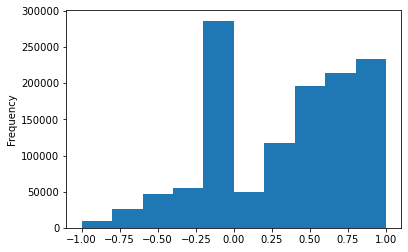

In [229]:
df['compound'].plot.hist()

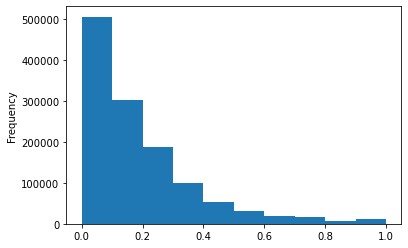

In [230]:
df['pos'].plot.hist()

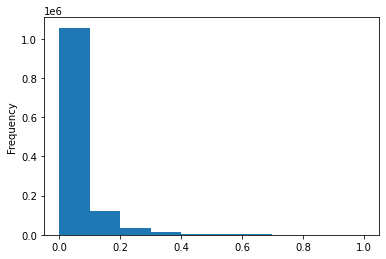

In [231]:
df['neg'].plot.hist()

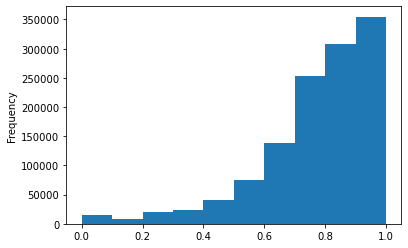

In [232]:
df['neu'].plot.hist()

## Low Score

In [150]:
df[df['score'] < 1]

edited        name  \
10       False       t1_c3o1orn   
60       False       t1_c3oz4q5   
62       False       t1_c3p139n   
83       False       t1_c3pfkht   
324      False       t1_c46o2aj   
...        ...              ...   
1237649  False       NaN          
1237743  False       NaN          
1237745  1541029594  NaN          
1237746  False       NaN          
1237748  False       NaN          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body  \
10       You are the epitome of the white person who packs a moleskin so that others can think you are creative. I bet you plan on using that moleskin and fountainpen in a coffee shop, hoping someone will come up to you and ask what deep thoughts you're pondering.   Use a waterproof fast drying ink for that shit. The paper does not absorb ink very well.   The type of paper you want has tooth to it - probably a cotton blend of some variety Rives BFK.               
60       Personally, I thought the TWSBI wrote like crap. It's a great pen and best in class in terms of starter pens, but if you spent just 50-100$ more you can get something like the Lamy 2000 or the Pilot Vanishing Point. The vast improvement over writing is well worth the extra money. I can't wait to see what it feels like to write with the next tier of pens, but unfortunately I am broke as shit and can't afford better.                                         
62       I've got a VP and a TWSBI and I would agree with you, insofar as you're talking about the old Schmidt nibs on the TWSBI. The new Bock nibs (admittedly, I've only tried the XF) are *very* nice. It obviously runs a bit wider than the Pilot "Fine" but in terms of feedback, smoothness, and expressiveness the TWSBI nib is every bit the VP's equal. And when you take into account the fact that the TWSBI holds probably 4x the ink, and is 1/3 the price, well...   
83       Loaded with features? It's a pen. I want elegant, not a pimped out buick.                                                                                                                                                                                                                                                                                                                                                                                                  
324      To be honest I don't think they will be coming. If this is the direction TWSBI is going I'm not sure they'll make anything similar to the  540 again.                                                                                                                                                                                                                                                                                                                      
...                                                                                                                                                        ...                                                                                                                                                                                                                                                                                                                      
1237649  Remember what you see here is a terrible basis for normal handwriting. What you see here are samples that pen enthusiasts want to show off. A normal person's writing, and in many cases the people here's everyday writing, is much worse than what gets posted.                                           

In [319]:
df[df['score'] < 1].describe(include='all')

edited        name     body  controversiality    downs       id  \
count   40620       12133    40620      40620.000000  12133.0    40620   
unique   1600       12133    39881               NaN      NaN    40620   
top     False  t1_cq2qfps  Thanks!               NaN      NaN  dfj15z9   
freq    39021           1       31               NaN      NaN        1   
first     NaN         NaN      NaN               NaN      NaN      NaN   
last      NaN         NaN      NaN               NaN      NaN      NaN   
mean      NaN         NaN      NaN          0.141556      0.0      NaN   
std       NaN         NaN      NaN          0.348598      0.0      NaN   
min       NaN         NaN      NaN          0.000000      0.0      NaN   
25%       NaN         NaN      NaN          0.000000      0.0      NaN   
50%       NaN         NaN      NaN          0.000000      0.0      NaN   
75%       NaN         NaN      NaN          0.000000      0.0      NaN   
max       NaN         NaN      NaN          1.000000      0.0      NaN   

       score_hidden         score author    link_id  author_flair_text  \
count         15964  40620.000000  40620      40620                0.0   
unique            1           NaN   7571      20949                NaN   
top           False           NaN  JobeX  t3_2t7k5t                NaN   
freq          15964           NaN   1258         70                NaN   
first           NaN           NaN    NaN        NaN                NaN   
last            NaN           NaN    NaN        NaN                NaN   
mean            NaN     -1.106302    NaN        NaN                NaN   
std             NaN      3.228906    NaN        NaN                NaN   
min             NaN   -131.000000    NaN        NaN                NaN   
25%             NaN     -1.000000    NaN        NaN                NaN   
50%             NaN      0.000000    NaN        NaN                NaN   
75%             NaN      0.000000    NaN        NaN                NaN   
max             NaN      0.000000    NaN        NaN                NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count       40620    18946           334         40620                40620   
unique      36211        2             1             1                40506   
top     t3_4ci927    False     moderator  fountainpens  2016-05-10 05:43:00   
freq           54    13680           334         40620                    5   
first         NaN      NaN           NaN           NaN  2011-05-18 23:01:40   
last          NaN      NaN           NaN           NaN  2018-10-31 23:43:18   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id   gilded author_flair_css_class         retrieved_on  \
count         40620  40620.0                  19715                40473   
unique            1      NaN                     37                40312   
top        t5_2s0ew      NaN             format f64  2016-06-12 17:33:53   
freq          40620      NaN                   3078                    6   
first           NaN      NaN                    NaN  2015-02-16 10:10:19   
last            NaN      NaN                    NaN  2018-11-08 14:39:06   
mean            NaN      0.0                    NaN                  NaN   
std             NaN      0.0                    NaN                  NaN   
min             NaN      0.0                    NaN                  NaN   
25%             NaN      0.0                    NaN               

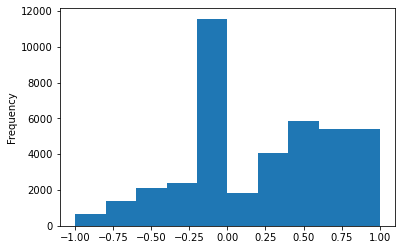

In [233]:
df[df['score'] < 1]['compound'].plot.hist()

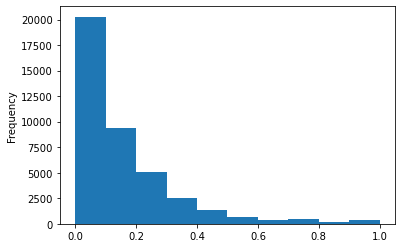

In [234]:
df[df['score'] < 1]['pos'].plot.hist()

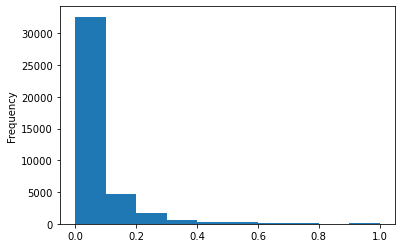

In [235]:
df[df['score'] < 1]['neg'].plot.hist()

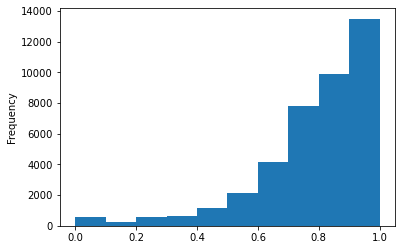

In [236]:
df[df['score'] < 1]['neu'].plot.hist()

In [69]:
with open('scores_low.txt', 'w') as f:
    ids = df[df['score'] < 1]['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

In [151]:
df[df['score'] < 0]

edited        name  \
10       False       t1_c3o1orn   
328      False       t1_c46up8c   
901      False       t1_c3k7sa0   
2035     False       t1_c55n4dc   
2503     False       t1_c5gxnqn   
...        ...              ...   
1237405  1541051876  NaN          
1237480  False       NaN          
1237513  False       NaN          
1237599  False       NaN          
1237632  False       NaN          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
10       You are the epitome of the white person who packs a moleskin so that others can think you are creative. I bet you plan on using that moleskin and fountainpen in a coffee shop, hoping someone will come up to you and ask what deep thoughts you're pondering.   Use a waterproof fast drying ink for that shit. The paper does not absorb ink very well.   The type of paper you want has tooth to it - probably a cotton blend of some variety Rives BFK.                                                                                                                                                       
328      This pen is $100 at that point it's becoming less affordable. When the 530 first came out it was amazing, $40 for a huge piston filler. This was fantastic.  At the $100 level of affordability (which is departing affordability in some regards) you could be buying a Pelikan m2XX or a Lamy 2K both of which are really great pens.  I've been waiting for the Vac for a long time, it looks great and if it was along the same lines as the 540 it would be a total must buy. But $100 for a C/C that's not that fancy. That's getting a bit much for me.                                                     
901      *First world problems.*                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2035     Anddd.... unsubscribed.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2503     Pens are a horrible gift, like seriously the worst gift ever for a groomsman.  Hey thanks for being in my wedding and spending all this time and money, heres a pen.  My suggestion and I think this has been by far one the best most usable gifts ever, for my brothers wedding he got all the groomsmen pocket knives with their names etched into the belt clip.  I wear and use mine nearly every day, I show it to people and they think its awesome, and everytime I see it, I think about my brother and his wedding.  Its not something Ill ever want to use and will

In [432]:
df.nsmallest(20, 'score')[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
785883                                                                                                                                                                                                                                               Anyone who spends forty grand on ink pens needs to have their shit jacked.   
1071062  Mediocre at best -- in order to really understand calligraphy and the complicated dynamics behind it, you must not only read a virtual myriad of literature on the subject, but also be trained in fountain (and in my case, ballpoint) pen calligraphy from the best of mentors.  Good effort though, for an amateur.   
1106325                                                                                                                            Fucking hell. They need an entire shop to sell their boring garbage?  Fuck I’m so sick to death of Lamy safaris. I saw one in a meeting the other day and wanted to shove it up the guys ass   
726311                                                                                                                                                                                                                                                                                                         Yes, he is fine.   
439740                                                                                                                                                               &gt;anxious  ~~Don't use that word in this context. It happens so often but it's incorrect. Anxious means nervous, not excited.~~  Edit: I stand corrected   
983048                                                                                                                                                       Useless unoriginal off-topic shit. This and NPD posts are spam and interesting stuff like discussions or reviews are getting buried underneath this pile of shit.    
1025268                                                                                                                                                           I do recommend capitalizing proper names and the beginning of sentences. Without capitalization it can be tedious teasing  meaning out of a jumble of words.    
1122697                                                                                                                                                                                                                                        Speak truth, get downvoted. Just another day in /r/InkStainedAutisticLemmings...   
1158837                                                                                                                                                                                                                              Where do you live that you could buy a house for 105k? Houses where I live start at 800k.    
666289                                                                                                                                                                                                         I've seen too many ppl try to write with a fountain pen that don't know what a fountain pen is... r/cringeworthy   
512897                                                                                                                                                                                        You need to get over it. A person a dog a pen oh Lordy  Cope in your own way, but splashing sadness on a pen forum seems grasping   
467244                                        Person gets mad, breaks pen and suddenly needs to be put in a home? Maybe I don't get western culture but are people so quick to send their parents to homes?  Edit: fml. second time I've been wooshed on reddit :/ Guess I've seen too many armchair psychologists to get this.   
825359                                                                                                              

In [257]:
df['compound'].quantile(0.12)

-0.1531

In [153]:
df['score'].quantile(0.9)

6.0

In [433]:
df.nsmallest(10, 'compound')[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
87594    chddmog   
725382   dejv7s1   
869116   dlryfx4   
286815   csrw19a   
1194905  e5qed4j   
884006   dmmclzv   
400950   cz37n8l   
91929    chppb6t   
149173   cm7qcbg   
898208   dncm9xj   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [328]:
neg_comments = df[df['compound'] < -0.5]
neg_comments.describe(include='all')

edited        name         body  controversiality    downs       id  \
count   57162       15074        57162      57162.000000  15074.0    57162   
unique   2496       15074        56655               NaN      NaN    57162   
top     False  t1_cf2v0ak  No problem!               NaN      NaN  dz1k992   
freq    54667           1           86               NaN      NaN        1   
first     NaN         NaN          NaN               NaN      NaN      NaN   
last      NaN         NaN          NaN               NaN      NaN      NaN   
mean      NaN         NaN          NaN          0.015902      0.0      NaN   
std       NaN         NaN          NaN          0.125098      0.0      NaN   
min       NaN         NaN          NaN          0.000000      0.0      NaN   
25%       NaN         NaN          NaN          0.000000      0.0      NaN   
50%       NaN         NaN          NaN          0.000000      0.0      NaN   
75%       NaN         NaN          NaN          0.000000      0.0      NaN   
max       NaN         NaN          NaN          1.000000      0.0      NaN   

       score_hidden         score       author    link_id  author_flair_text  \
count         19464  57162.000000        57162      57162                0.0   
unique            2           NaN        11741      30572                NaN   
top           False           NaN  anser_penna  t3_4gwajt                NaN   
freq          19404           NaN          502         64                NaN   
first           NaN           NaN          NaN        NaN                NaN   
last            NaN           NaN          NaN        NaN                NaN   
mean            NaN      3.297015          NaN        NaN                NaN   
std             NaN      7.166472          NaN        NaN                NaN   
min             NaN    -77.000000          NaN        NaN                NaN   
25%             NaN      1.000000          NaN        NaN                NaN   
50%             NaN      2.000000          NaN        NaN                NaN   
75%             NaN      3.000000          NaN        NaN                NaN   
max             NaN    414.000000          NaN        NaN                NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count       57162    22699            22         57162                57162   
unique      50352        2             2             1                57135   
top     t3_544vlm    False     moderator  fountainpens  2017-06-30 14:07:14   
freq           33    16392            21         57162                    3   
first         NaN      NaN           NaN           NaN  2010-11-15 05:02:02   
last          NaN      NaN           NaN           NaN  2018-10-31 23:17:37   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count         57162  57162.000000                  26299                57079   
unique            1           NaN                     37                57015   
top        t5_2s0ew           NaN             format f64  2017-07-11 16:44:20   
freq          57162           NaN                   4399                    3   
first           NaN           NaN                    NaN  2015-02-16 10:19:13   
last            NaN           NaN                    NaN  2018-11-08 14:27:05   
mean            NaN      0.000210                    NaN                  NaN   
std             NaN      0.014488     

In [329]:
neg_comments[neg_comments['score'] < 1].describe()

controversiality  downs        score  author_flair_text  gilded  \
count       2988.000000  924.0  2988.000000                0.0  2988.0   
mean           0.164993    0.0    -1.949465                NaN     0.0   
std            0.371237    0.0     5.010179                NaN     0.0   
min            0.000000    0.0   -77.000000                NaN     0.0   
25%            0.000000    0.0    -2.000000                NaN     0.0   
50%            0.000000    0.0     0.000000                NaN     0.0   
75%            0.000000    0.0     0.000000                NaN     0.0   
max            1.000000    0.0     0.000000                NaN     0.0   

               ups  removal_reason  report_reasons  approved_by  banned_by  \
count  1587.000000             0.0             0.0          0.0        0.0   
mean     -1.725898             NaN             NaN          NaN        NaN   
std       4.341780             NaN             NaN          NaN        NaN   
min     -65.000000             NaN             NaN          NaN        NaN   
25%      -2.000000             NaN             NaN          NaN        NaN   
50%       0.000000             NaN             NaN          NaN        NaN   
75%       0.000000             NaN             NaN          NaN        NaN   
max       0.000000             NaN             NaN          NaN        NaN   

       likes       created  num_reports  replies  banned_at_utc  mod_note  \
count    0.0  1.000000e+00          0.0      0.0            0.0       0.0   
mean     NaN  1.423534e+09          NaN      NaN            NaN       NaN   
std      NaN           NaN          NaN      NaN            NaN       NaN   
min      NaN  1.423534e+09          NaN      NaN            NaN       NaN   
25%      NaN  1.423534e+09          NaN      NaN            NaN       NaN   
50%      NaN  1.423534e+09          NaN      NaN            NaN       NaN   
75%      NaN  1.423534e+09          NaN      NaN            NaN       NaN   
max      NaN  1.423534e+09          NaN      NaN            NaN       NaN   

       mod_reason_by  mod_reason_title  author_flair_background_color  \
count            0.0               0.0                            0.0   
mean             NaN               NaN                            NaN   
std              NaN               NaN                            NaN   
min              NaN               NaN                            NaN   
25%              NaN               NaN                            NaN   
50%              NaN               NaN                            NaN   
75%              NaN               NaN                            NaN   
max              NaN               NaN                            NaN   

               neg          neu          pos     compound  
count  2988.000000  2988.000000  2988.000000  2988.000000  
mean      0.253421     0.712826     0.033753    -0.683849  
std       0.171822     0.171281     0.045845     0.128633  
min       0.028000     0.000000     0.000000    -0.997500  
25%       0.137000     0.650000     0.000000    -0.778450  
50%       0.202000     0.755000     0.000000    -0.666850  
75%       0.307250     0.830000     0.061000    -0.571900  
max       1.000000     0.963000     0.276000    -0.500200

In [334]:
neg_comments[neg_comments['score'] < 1].sample(10)

edited        name  \
1008801  False         NaN   
202527   False  t1_cos4riw   
603506   False         NaN   
939909   False         NaN   
123357   False  t1_ck9zeoz   
262714   False  t1_crk60ds   
1010783  False         NaN   
1183315  False         NaN   
292421   False  t1_ct1vra7   
275170   False  t1_cs50w23   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           body  \
1008801  I have a Karas Ink and have had issues with the ink flow seemingly just drying up while writing. Basically I found that it only happened with Sailor Sei Boku - my workhorse ink. It’s a microparticulate ink and is a bit more viscous than normal.   Anyway, the ink was getting stuck in the Schmidt International converter supplied with the pen. That converter is just too narrow and it causes thick inks (like EoC) to stick to the walls instead of flowing down. I took the small plastic BB / ink agitator from an empty Kaweco cartridge and put it into the converter - problem solved. The BB breaks up the surface tension on the ink and allows for uninterrupted and quite wet flow.   
202527                                                                                                                                                                                                                                                Man all this hate, do you people do research on pens or just buy them all. They are made for tinkerers because they require tinkering. I think another problem people have is they have no idea how to use a flex pen.  You need to keep consistent speed and flow, it's not easy. This is like hating on a paint brush because you can't paint. I've had all 3 noodlers pens and barely had to mess with them to get them to work, it's not that hard.     
603506                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    That looks suspiciously light to me.  I have only four bottles of Iro, and none looked like that new.   
939909                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                I hope you shit your pants. That's a fitting punishment for such actions.   
123357                                                                                                                                                                                                                        

### Low score: investigating words of interest

In [355]:
df[(df['score'] < 0) & df['body'].str.contains('post', case=False)].sample(10)

edited        name  \
905864   False         NaN   
183732   False  t1_cnwr1m3   
88806    False  t1_chgh69w   
490160   False         NaN   
455292   False         NaN   
1094851  False         NaN   
84642    False  t1_ch6b72k   
372937   False         NaN   
1008870  False         NaN   
1191616  False         NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body  \
905864                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Hi there! I've been summoned by /u/browniebiznatch because it appears that you're asking about starting out in the fountain pen world. If that's not the case, please pardon the assumption! However, if you are indeed a fountain pen beginner, please:   * See our page on [beginner pens](http://www.reddit.com/r/fountainpens/wiki/newusers/start).   * See our page on [maintenance and accessories](http://www.reddit.com/r/fountainpens/wiki/index).  * See our list of [generally well-liked vendors](https://www.reddit.com/r/fountainpens/wiki/index#wiki_vendors).  * Post in our [Weekly New User Thread](http://www.reddit.com/r/fountainpens/about/sticky) on the frontpage of the subreddit if you still have questions.   This submission was **not** removed, and we do **not** require that you remove it (unless you really want to). So do check back to see if (human) users have answered any specific questions you included in the post.   *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/mes

In [434]:
df[(df['score'] < 0) & df['body'].str.contains('saying', case=False)].sample(10)[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
205855                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Yep! [Here's a thread about it on FPN.](http://www.fountainpennetwork.com/forum/index.php/topic/281067-edison-new-filling-system/?p=3264898) Brian Gray commented in there a couple weeks ago saying the announcement would come late Feb or in March. I'll definitely make a post about it when it arrives! That's the only downside to custom orders ... I ordered that urushi Edison in September ...   Oh, I didn't know the nib units unscrewed. I thought it was like Montblanc where you needed a special tool to fit into the grooves on the nib unit. That's not too bad then.   I guess I have a thing for simple, clipless pens. Budget Nakaya is probably a decent way to describe it. But the main attraction for Eboya is probably the Japanese ED filler. The only other way to get that is with a $1000+ Danitrio or a Namiki Emperor at like $7,000+. $400 for a C/C-filler, simple ebonite, pen is I admit a hard sell - I wouldn't buy it. If I got one, I'd pay the premium to get the shut-off valve system.      
87680                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [435]:
df[(df['score'] < 0) & df['body'].str.contains('just saying', case=False)].sample(10)[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
1080426                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Lamy 2000 - just saying...   
892210                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [437]:
df[(df['score'] < 0) & df['body'].str.contains('why i ', case=False)].sample(10)[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
1110151                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Thanks for these points and baiting the empirical ‘we’ (though a ‘99%’ hunch off-the-cuff is certainly no more accurate a measure of representativeness than a summary of recent posts expressing devotion to their Lamys and the buying dynamics respected by other elite brands, like Montblanc and Visconti, which produce endless variations and colors on their classical designs). But, I think #2 exhibits precisely the good ‘rational actor’ faith in Lamy that many have come to question. To name just one example, that the Black Amber was an abysmal business decision has been reported by many outlets that ought to know [e.g., Pen Economics]. I for one no longer trust that their course of action is a business optimal one, which is why I welcome opinions that could illuminate a different decision making logic. #3 was a hunch I put in the post and is the only interpretation I see that makes much sense ... except that it doesn’t make much sense. Many people would not find that a new color would cheapen the pen at all and indeed Lamy has released the 2K in four colors, albeit one is unavailable and two are stainless steel. So clearly they’re not terribly worried about different colors either.   Honestly to me the best answer is maybe they’re a family run company (?) and aren’t driven purely by corporate growth logics. Maybe they simply don’t want to because they just don’t want to and it’s not something they have to justify to a board of directors. But if it does make sense for Lamy to not do a different color, whereas Montblanc and Visconti and others can riff endlessly on their own life icons, I’d love to know how it works.   
1192657                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [360]:
df[(df['score'] < 0) & df['body'].str.contains('pardon', case=False)].sample(10)

edited        name  \
210050   False  t1_cp4pyeh   
482274   False         NaN   
935542   False         NaN   
1114136  False         NaN   
885254   False         NaN   
420155   False         NaN   
903645   False         NaN   
898876   False         NaN   
896901   False         NaN   
1184827  False         NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
210050                    Hi Gladiaxis!   Looks like you're asking about what pen to get if you're just starting out in the fountain pen world. If that's not the case, please pardon the assumption! However, if you are indeed a fountain pen beginner, please see our wiki. It has a good write-up on [beginner pens](http://www.reddit.com/r/fountainpens/wiki/newusers/start). The wiki also has [lots of great information](http://www.reddit.com/r/fountainpens/wiki/index) on maintenance and accessories. If you still have questions, you can always find our [Weekly New User Thread](http://www.reddit.com/r/fountainpens/about/sticky) on the frontpage of the subreddit.   This submission was **not** removed, and we do **not** require that you remove it (unless you really want to). So do check back to see if (human) users have answered any specific questions you included in the post.    *[I am a bot](/r/AutoModerator/comments/q11pu/what_is_automoderator/), and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose?to=%2Fr%2Ffountainpens) if you have any questions or concerns.*   
482274               Hi there! I've been summoned by /u/ekfritz because it appears that you're asking about starting out in the fountain pen world. If that's not the case, please pardon the assumption! However, if you are indeed a fountain pen beginner, please:   * See our page on [beginner pens](http://www.reddit.com/r/fountainpens/wiki/newusers/start).   * See our page on [maintenance and accessories](http://www.reddit.com/r/fountainpens/wiki/index).  * See our list of [generally well-liked vendors](https://www.reddit.com/r/fountainpens/wiki/index#wiki_vendors).  * Post in our [Weekly New User Thread](http://www.reddit.com/r/fountainpens/about/sticky) on the frontpage of the subreddit if you still have questions.   This submission was **not** removed, and we do **not** require that you remove it (unless you really want to). So do check back to see if (human) users have answered any specific questions you included in the post.   *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/fountainpens) if you have any questions or concerns.*   
935542                  Hi there! I've been summoned by /u/EMQG because it appears that you're asking about starting out in the fountain pen world. If that's not the case, please pardon the assumption! However, if you are indeed a fountain pen beginner, please:   * See our page

## High Score

In [260]:
df[df['score'] > 6]

In [339]:
df[df['score'] > 6].describe(include='all')

edited        name   body  controversiality    downs       id  \
count   94331       13714  94331      94331.000000  13714.0    94331   
unique   5251       13714  93768               NaN      NaN    94331   
top     False  t1_c98ygsc      F               NaN      NaN  e68g7y3   
freq    89077           1     17               NaN      NaN        1   
first     NaN         NaN    NaN               NaN      NaN      NaN   
last      NaN         NaN    NaN               NaN      NaN      NaN   
mean      NaN         NaN    NaN          0.000519      0.0      NaN   
std       NaN         NaN    NaN          0.022786      0.0      NaN   
min       NaN         NaN    NaN          0.000000      0.0      NaN   
25%       NaN         NaN    NaN          0.000000      0.0      NaN   
50%       NaN         NaN    NaN          0.000000      0.0      NaN   
75%       NaN         NaN    NaN          0.000000      0.0      NaN   
max       NaN         NaN    NaN          1.000000      0.0      NaN   

       score_hidden         score     author    link_id  author_flair_text  \
count         25118  94331.000000      94331      94331                0.0   
unique            1           NaN      14298      32512                NaN   
top           False           NaN  JonSzanto  t3_30mxg6                NaN   
freq          25118           NaN       1220        138                NaN   
first           NaN           NaN        NaN        NaN                NaN   
last            NaN           NaN        NaN        NaN                NaN   
mean            NaN     14.304905        NaN        NaN                NaN   
std             NaN     17.222935        NaN        NaN                NaN   
min             NaN      7.000000        NaN        NaN                NaN   
25%             NaN      8.000000        NaN        NaN                NaN   
50%             NaN     10.000000        NaN        NaN                NaN   
75%             NaN     14.000000        NaN        NaN                NaN   
max             NaN   1016.000000        NaN        NaN                NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count       94331    33311           106         94331                94331   
unique      63145        2             2             1                94250   
top     t3_30mxg6    False     moderator  fountainpens  2018-05-29 02:38:27   
freq           51    29089           105         94331                    2   
first         NaN      NaN           NaN           NaN  2011-05-24 02:50:12   
last          NaN      NaN           NaN           NaN  2018-10-31 23:51:30   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count         94331  94331.000000                  41943                94264   
unique            1           NaN                     36                94056   
top        t5_2s0ew           NaN             format f64  2017-06-08 05:49:30   
freq          94331           NaN                   6768                    2   
first           NaN           NaN                    NaN  2015-02-16 10:14:30   
last            NaN           NaN                    NaN  2018-11-08 14:43:16   
mean            NaN      0.000827                    NaN                  NaN   
std             NaN      0.028744                    NaN                  NaN   
min             NaN      0.000000                    NaN             

In [438]:
df.nlargest(10, 'score')[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
422816   d01fcdi   
1089531  dyeeizv   
957102   dqz6f7g   
1126609  e0rn7kh   
285706   csqtxkf   
1024518  duob6tp   
847101   dkk9z2z   
740205   df81h6o   
676505   dcke6fo   
537064   d4ol3mj   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                body  \
422816                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Write us a pretty calligraphy thank you note, you fancy fucks.   
1089531                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  That’s the new Pilot Eagle.   
957102                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                &gt; implying I would let filthy peasants touch my fountain pens    &gt; absolutely_not_me_irl   
1126609  I'm sorry you haven't enjoyed your experience with fountain pens, but it seems like you gave it a fair shake.  I really appreciate the honesty and self-awareness you are showing with this.   It might not be a popular post, due to the nature of the sub, but it's also a good reminder that not every hobby is for everyone.  We joke around a lot about proselytizing for fountain pens and converting people to using them, but it's not always going to be the right tools for every person.  I hope you can spend your time and money on hobbies from which you get more enjoyment.   
285706                                                                                                                                                                                                                                                         Thank you for the transparency and for not having a kneejerk reaction to the goings on (with exception of the already apologized for happening).  I cannot pretend to understand half of what has happened today (nor do I care enough to try and sort it out) but I can only imagine that this has all been a very long time coming.   
1024518                                                                                                                                                                                                                                                                                          

In [439]:
df.nlargest(10, 'compound')[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
657419   dbnokwq   
1076615  dxnqlyb   
1111914  dzqri6d   
207414   cp07imw   
561022   d64v76g   
732743   devulpu   
895071   dn6wl1d   
158722   cmpifzl   
163053   cmwl26y   
392737   cypggr8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [440]:
df.nlargest(10, 'pos')[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id              body  score  pos  neg  compound
25   c3o52gn        Thanks!         2  1.0  0.0    0.4926
44   c3ofv3w           Thanks!      1  1.0  0.0    0.4926
343  c14ik86           Agreed.      1  1.0  0.0    0.2732
543  c268oh0  Perfect, thanks!      1  1.0  0.0    0.7840
611  c2u5e79    Yes, please.        1  1.0  0.0    0.6124
642  c2x709u  Yes, definitely!      3  1.0  0.0    0.6900
695  c32vpis       Definitely!      1  1.0  0.0    0.4574
698  c32zmtu              YES       1  1.0  0.0    0.4019
713  c36v0sr           Thanks!      1  1.0  0.0    0.4926
832  c3ewz6b   Yes, excellent.      1  1.0  0.0    0.7506

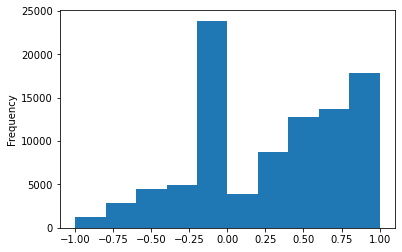

In [263]:
df[df['score'] > 6]['compound'].plot.hist()

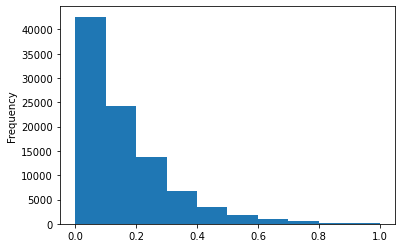

In [264]:
df[df['score'] > 6]['pos'].plot.hist()

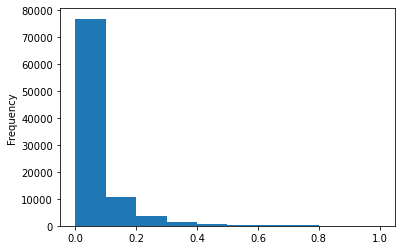

In [265]:
df[df['score'] > 6]['neg'].plot.hist()

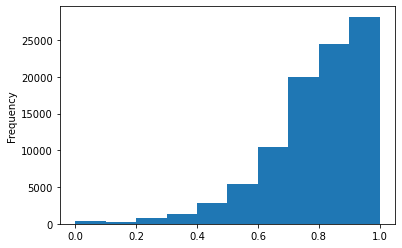

In [266]:
df[df['score'] > 6]['neu'].plot.hist()

In [441]:
df[(df['score'] > 6)].sample(10)[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
444477   d0v4abj   
863907   dlgqqn5   
929004   dp5k9r1   
324758   cuuby92   
1108425  dzhjojq   
975344   ds1mz8d   
853995   dkxcn11   
929267   dp62um5   
1176770  e4gx11m   
873157   dlzouok   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              body  \
444477                                                                                                                                                                                                                                                                                                                                                                                                                  My father was a huge stylophile, and when he died I inherited a lot of very nice pens( Mont Blanc, Sheaffer, etc).  This is my daily, though, and I honestly cant get over how beautifully this thing writes.  If you can score one for under $30 its a bargain.  The .6mm calligraphy tip is a must  [Link](http://www.amazon.com/Nemosine-Fission-Fountain-Gunmetal-NEM-FIS-03-M/dp/B00AHJA7PM/ref=sr_1_2?s=home-garden&amp;ie=UTF8&amp;qid=1457640464&amp;sr=8-2&amp;keywords=nemosine)   
863907                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            First of all I preface it with - this is my hobby and requires no validation from anyone.  I collect pens because I find them objects of beauty.  I enjoy collecting inks.  As writing experience goes it's far superior.   I find the activity to be a great for 'mindfulness' .  I enjoy writing.  I think that covers things.   
929004   Today I learned the first Friday of November is "Fountain Pen Day." I saw, on social media, four US pen, ink &amp; paper purveyors promoting pen giveaways, and was excited. Then I learned every one of those four purveyors used Rafflecopter as a means of collecting entrants, or required as a first step subscribing to their newsletter. If a prospective entrant already subscribed to a newsletter then s/he had to create or use an Instagram account, Facebook account, et cetera. Practically all giveaways' entry methods require a sequential fulfillment, rather than giving entrants a lateral choice of how to enter.  It makes me wonder if "Fountain Pen Day" was created by Rafflecopter. I know not all pen suppliers rely on this arrangement for prize giveaways: last year I entered a Franklin-Christoph giveaway by mail, handwriting an entry with, naturally, a fountain pen.   
324758                                                                                                                                                                                                                                                   

In [442]:
df[(df['score'] > 6) & (df['compound'] < -0.5)].sample(10)[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
967698   drl98ko   
707396   ddsz2lc   
940689   dpw7j9i   
1009325  dtvz24f   
154719   cmil7im   
191513   co9gnvn   
1165912  e3ofnkx   
919141   dokx0xx   
1081649  dxxtowx   
1111533  dzplie1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   body  \
967698   Well, I basically agree. I just use the cotton cloth to buff it a bit to remove dirt, smudges, maybe a bit of tarnish, not in the sense that it would remove scratches and wear. I see no reason to not at least have it clean via non-invasive methods.  The thing that people don't realize is a scratch is *material removed*. You don't get rid of scratches, *you take down all the other material to that level*. This is why it is such a bad idea on a gf cap, and why over-polished pen bodies get ruined because they polish off the imprint and such. Removal of material is non-reversible and not to be condoned.   
707396                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Jesus that's one of the worst case of sumgai I've ever seen.   
940689                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         I think they kind of defeat the purpose.   
1009325                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            I really need to stop speedreading while filtering through r/all. :/   
154719                                                                                                                                                                                                                                                                                                                                                                            I had to use Parker 51 knockoffs throughout my childhood and grew to hate everything about it. Can't stand the design even until now. Anyway, the most beautiful part of a pen is the nib, it doesn't make sense to hide it with that ugly hood IMO.    
191513                                                                         

### High score: investigating words of interest

In [443]:
df[(df['score'] > 6) & df['body'].str.contains('people')].sample(10)[['id', 'body', 'score', 'pos', 'neg', 'compound']]

id  \
780783   dhabxb4   
289932   csx7zh9   
245569   cqso56s   
431727   d0dr7xh   
320106   cukj98i   
853174   dkvxxcg   
579525   d78kx6a   
825000   dji9nj7   
1030593  duykph3   
415548   czpypsd   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    body  \
780783                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [444]:
df[(df['score'] > 6) & df['body'].str.contains('community')].sample(10)[['id', 'body', 'score']]

id  \
1097989  dyvh60m   
1176034  e4f4wcu   
366641   cxbscdr   
900665   dnhexk8   
236748   cqe0zkq   
347855   cw9ujn8   
538693   d4s4397   
1114685  dzxrfcu   
1099764  dyzetgr   
283348   csm0ar5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    body  \
1097989                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [377]:
df[(df['score'] > 6) & df['body'].str.contains('someone')].sample(10)[['id', 'body', 'score']]

id  \
146334   cm20ppm   
636298   dajgn66   
256484   cr9rscw   
747814   dflp2sw   
329230   cv4lr78   
684482   dcx54pi   
562895   d68zdu4   
839130   dk6txmy   
1192238  e5jaznz   
219482   cplbwjd   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [446]:
df[(df['score'] > 6) & df['body'].str.contains('your')].sample(10)[['id', 'body', 'score']]

id  \
842458   dkctmng   
873723   dm107s6   
1029135  duw0952   
859618   dl82diz   
113137   cjfaqf4   
532767   d4go11k   
1203388  e6b18kv   
1019279  due572h   
312079   cu57cp9   
306134   cttvkfq   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body  \
842458                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [447]:
df[(df['score'] > 6) & df['body'].str.contains('your best bet')].sample(10)[['id', 'body', 'score']]

id  \
1229625  e8740zl   
966986   drjlili   
701456   ddkt8sb   
1091742  dyij9w6   
1006600  dtqmmzi   
656598   dbmndyt   
606113   d8ldoxj   
267069   crquf03   
43778    ce1ai25   
666786   dc3m90v   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              body  \
1229625  Pretty subjective, honestly.  What are you looking for in a gold nib?  Cost alone?  Flex?  An interesting nib grind?  Feedback or glassy writing?  Do you absolutely need a piston filler, or will you survive with a cartridge/converter pen?  For flex/semi-flex, the recommendation is usually towards vintage (but not all vintage gold nibs are default flex, so you do need to know what you're buying).  Vintage pens come with the bonus of interesting history, but potentially difficult/pricey maintenance if not buying restored (non functional vac fillers, broken snorkels, ossified ink sacs etc).  However, a properly restored vintage pen is a wonderful experience, especially when you get a great deal.  If you want an interesting nib style (zoom, music, etc) your best bets are to go with Japanese pens since they have options beyond just F-B.  You can also get soft gold nibs (not the same as flex) with brands like Platinum.  Defaulting to a thick gold nib like a music will also give you a whole lot of material to work with should you send it out to a nibmeister for a special grind.   If you want some feedback on your gold nib, Platinum and Sailor will definitely have you covered.  Both are known for their tactile feedback, and finer nibs will really express it - sometimes fine Platinums can run dry, but may be adjusted to write wetter.  If you prefer a glassier nib, Pelikan gold nibs are pretty known for their glide as well as being very wet writers (but they do have a bit of a gamble on if they'll write perfectly out of the box, mine have all been fine though).   
966986                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [451]:
df[(df['score'] > 6) & df['body'].str.contains('your handwriting')].sample(10)[['id', 'body', 'score']]

id  \
1171892  e43fc97   
238791   cqi3msw   
874003   dm1jraq   
693858   ddax6xx   
762832   dgdj7ve   
857999   dl4y082   
433365   d0ft7lw   
390235   cylqyxz   
1129270  e0yhyaw   
45463    ce92eiz   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          body  \
1171892                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Not at all, I know that comic sans it's hated for it's over-use, but it isn't an ugly font. It looks friendly and it's easy to read. I don't use comic sans though. What I meant is that the combination of your pen's nib size with your handwriting looks nice and clean.    
238791                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Are you going to leave us hanging on the identity of the whiskey?  Also, your handwriting is very nice and that green is fantastic.   
874003                                                                          My tip: slowly turn and walk away now if you don't want to wake up in a year wondering where all your money has gone.      Just kidding... kind of ;)      Definitely be sure not to use pressure if you're used to ballpoints. One joy of fountain pens is the lack of pressure needed, so you can write for longer periods of time with less fatigue.      Don't be discouraged if you bought your pen hoping for a magical transformation in your handwriting! Not everyone thinks this, but I've noticed that it's a common misconception.      Try new inks! Using a converter is easy. It took me months to take the plunge because I was worried I'd mess something up.   
693858                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        I wonder if Lamy's triangular grip can help encourage a "proper" grip? (For the record, your handwriting looks perfectly fine in both cases IMO)   
762832   If you're looking for consistent line variation: the music nib. You won't have to worry about 

In [70]:
with open('scores_high.txt', 'w') as f:
    ids = df[df['score'] > 6]['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

## Thanks

In [271]:
thanks_df = df[df['body'].str.contains("thank") | df['body'].str.contains('Thank')]

In [272]:
thanks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100738 entries, 23 to 1237736
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   edited                         100738 non-null  object        
 1   name                           23126 non-null   object        
 2   body                           100738 non-null  object        
 3   controversiality               100738 non-null  int64         
 4   downs                          23126 non-null   float64       
 5   id                             100738 non-null  object        
 6   score_hidden                   31969 non-null   object        
 7   score                          100738 non-null  int64         
 8   author                         100738 non-null  object        
 9   link_id                        100738 non-null  object        
 10  author_flair_text              0 non-null       float64       
 11

In [273]:
thanks_df.describe(include='all')

edited        name     body  controversiality    downs       id  \
count   100738       23126   100738     100738.000000  23126.0   100738   
unique    2934       23126    89647               NaN      NaN   100738   
top      False  t1_cjpni1i  Thanks!               NaN      NaN  dcz5pjz   
freq     97801           1     2328               NaN      NaN        1   
first      NaN         NaN      NaN               NaN      NaN      NaN   
last       NaN         NaN      NaN               NaN      NaN      NaN   
mean       NaN         NaN      NaN          0.004368      0.0      NaN   
std        NaN         NaN      NaN          0.065945      0.0      NaN   
min        NaN         NaN      NaN          0.000000      0.0      NaN   
25%        NaN         NaN      NaN          0.000000      0.0      NaN   
50%        NaN         NaN      NaN          0.000000      0.0      NaN   
75%        NaN         NaN      NaN          0.000000      0.0      NaN   
max        NaN         NaN      NaN          1.000000      0.0      NaN   

       score_hidden          score       author    link_id  author_flair_text  \
count         31969  100738.000000       100738     100738                0.0   
unique            2            NaN        18982      43862                NaN   
top           False            NaN  anser_penna  t3_5ru7jo                NaN   
freq          31912            NaN          775        137                NaN   
first           NaN            NaN          NaN        NaN                NaN   
last            NaN            NaN          NaN        NaN                NaN   
mean            NaN       2.058409          NaN        NaN                NaN   
std             NaN       5.494230          NaN        NaN                NaN   
min             NaN     -36.000000          NaN        NaN                NaN   
25%             NaN       1.000000          NaN        NaN                NaN   
50%             NaN       1.000000          NaN        NaN                NaN   
75%             NaN       2.000000          NaN        NaN                NaN   
max             NaN    1016.000000          NaN        NaN                NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count      100738    38574             9        100738               100738   
unique      93598        2             1             1               100680   
top     t3_5ru7jo    False     moderator  fountainpens  2017-06-05 20:02:37   
freq          133    28423             9        100738                    2   
first         NaN      NaN           NaN           NaN  2010-09-03 13:46:42   
last          NaN      NaN           NaN           NaN  2018-10-31 23:13:51   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id         gilded author_flair_css_class  \
count        100738  100738.000000                  35270   
unique            1            NaN                     36   
top        t5_2s0ew            NaN             format f64   
freq         100738            NaN                   6000   
first           NaN            NaN                    NaN   
last            NaN            NaN                    NaN   
mean            NaN       0.000308                    NaN   
std             NaN       0.017540                    NaN   
min             NaN       0.000000                    NaN   
25%             NaN       0.000000                    NaN   
50%             NaN       0.000000          

In [274]:
thanks_df.head()

edited        name  \
23  False  t1_c3o51q2   
24  False  t1_c3o521r   
25  False  t1_c3o52gn   
44  False  t1_c3ofv3w   
63  False  t1_c3p16bw   

                                                                               body  \
23          Thanks.  I am familiar with Rhodia but will look into Quo Vadis Habana.   
24                       Thanks!   I doubt it will see much traffic, but who knows?   
25                                                                       Thanks!      
44                                                                          Thanks!   
63  Didn't know they came out with new nibs.. will have to look into this.. Thanks!   

    controversiality  downs       id score_hidden  score        author  \
23                 0    0.0  c3o51q2        False      2   ArchGoodwin   
24                 0    0.0  c3o521r        False      1   ArchGoodwin   
25                 0    0.0  c3o52gn        False      2   ArchGoodwin   
44                 0    0.0  c3ofv3w        False      1   ArchGoodwin   
63                 0    0.0  c3p16bw        False      1  iamsoserious   

     link_id  author_flair_text   parent_id archived distinguished  \
23  t3_pber1                NaN  t1_c3o2526     True           NaN   
24  t3_pber1                NaN  t1_c3o31m5     True           NaN   
25  t3_pber1                NaN  t1_c3o2zwa     True           NaN   
44  t3_pber1                NaN  t1_c3od0ad     True           NaN   
63  t3_pf1ix                NaN  t1_c3p139n     True           NaN   

       subreddit         created_utc subreddit_id  gilded  \
23  fountainpens 2012-02-05 17:31:11     t5_2s0ew       0   
24  fountainpens 2012-02-05 17:32:08     t5_2s0ew       0   
25  fountainpens 2012-02-05 17:33:22     t5_2s0ew       0   
44  fountainpens 2012-02-06 16:33:04     t5_2s0ew       0   
63  fountainpens 2012-02-08 06:16:35     t5_2s0ew       0   

   author_flair_css_class        retrieved_on  ups  removal_reason  \
23                    NaN 2015-04-06 06:05:01  2.0             NaN   
24                    NaN 2015-04-06 06:05:08  1.0             NaN   
25                    NaN 2015-04-06 06:05:15  2.0             NaN   
44                    NaN 2015-04-06 07:31:01  1.0             NaN   
63                    NaN 2015-04-06 10:21:53  1.0             NaN   

    report_reasons  approved_by saved user_reports  banned_by  likes  \
23             NaN          NaN   NaN          NaN        NaN    NaN   
24             NaN          NaN   NaN          NaN        NaN    NaN   
25             NaN          NaN   NaN          NaN        NaN    NaN   
44             NaN          NaN   NaN          NaN        NaN    NaN   
63             NaN          NaN   NaN          NaN        NaN    NaN   

   body_html mod_reports  created  num_reports  replies stickied  \
23       NaN         NaN      NaN          NaN      NaN      NaN   
24       NaN         NaN      NaN          NaN      NaN      NaN   
25       NaN         NaN      NaN          NaN      NaN      NaN   
44       NaN         NaN      NaN          NaN      NaN      NaN   
63       NaN         NaN      NaN          NaN      NaN      NaN   

   author_cakeday can_gild approved_at_utc can_mod_post collapsed  \
23            NaN      NaN             NaT          NaN       NaN   
24            NaN      NaN             NaT          NaN       NaN   
25            NaN      NaN             NaT          NaN       NaN   
44            NaN      NaN             NaT          NaN       NaN   
63            NaN      NaN             NaT          NaN       NaN   

   collapsed_reason  banned_at_utc is_submitter permalink subreddit_type  \
23              NaN            NaN          NaN       NaN            NaN   
24              NaN            NaN          NaN       NaN            NaN   
25              NaN            NaN          NaN       NaN            NaN   
44              NaN            NaN          NaN       NaN            NaN   
63              NaN            NaN    

In [80]:
100738/1237759

0.08138741063486511

8% of comments say thanks

In [160]:
thanks_df['is_submitter'].value_counts()

True     19904
False    15105
Name: is_submitter, dtype: int64

In [86]:
19904/(19904+15105)

0.5685395184095519

In [87]:
19904/100738

0.197581845976692

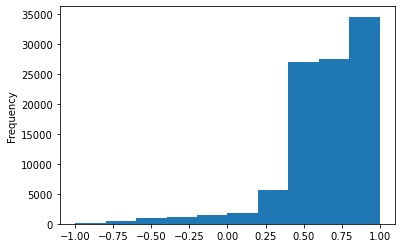

In [288]:
thanks_df['compound'].plot.hist()

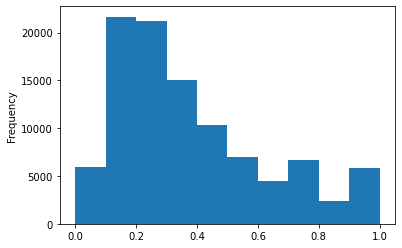

In [289]:
thanks_df['pos'].plot.hist()

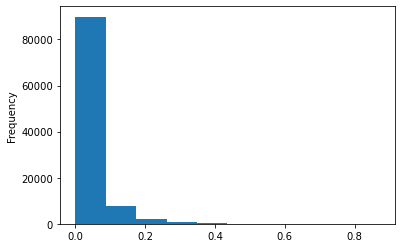

In [290]:
thanks_df['neg'].plot.hist()

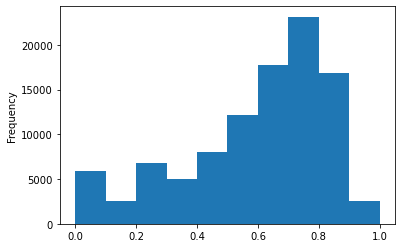

In [291]:
thanks_df['neu'].plot.hist()

In [275]:
comment_thanks = thanks_df[thanks_df['parent_id'].str.startswith('t1')]
comment_thanks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84074 entries, 23 to 1237736
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edited                         84074 non-null  object        
 1   name                           19270 non-null  object        
 2   body                           84074 non-null  object        
 3   controversiality               84074 non-null  int64         
 4   downs                          19270 non-null  float64       
 5   id                             84074 non-null  object        
 6   score_hidden                   26675 non-null  object        
 7   score                          84074 non-null  int64         
 8   author                         84074 non-null  object        
 9   link_id                        84074 non-null  object        
 10  author_flair_text              0 non-null      float64       
 11  parent_id   

In [276]:
comment_thanks.describe(include='all')

edited        name     body  controversiality    downs       id  \
count   84074       19270    84074      84074.000000  19270.0    84074   
unique   1834       19270    73368               NaN      NaN    84074   
top     False  t1_cjpni1i  Thanks!               NaN      NaN  dcz5pjz   
freq    82239           1     2289               NaN      NaN        1   
first     NaN         NaN      NaN               NaN      NaN      NaN   
last      NaN         NaN      NaN               NaN      NaN      NaN   
mean      NaN         NaN      NaN          0.003223      0.0      NaN   
std       NaN         NaN      NaN          0.056683      0.0      NaN   
min       NaN         NaN      NaN          0.000000      0.0      NaN   
25%       NaN         NaN      NaN          0.000000      0.0      NaN   
50%       NaN         NaN      NaN          0.000000      0.0      NaN   
75%       NaN         NaN      NaN          0.000000      0.0      NaN   
max       NaN         NaN      NaN          1.000000      0.0      NaN   

       score_hidden         score       author    link_id  author_flair_text  \
count         26675  84074.000000        84074      84074                0.0   
unique            2           NaN        16734      39406                NaN   
top           False           NaN  anser_penna  t3_37s9bp                NaN   
freq          26634           NaN          657         81                NaN   
first           NaN           NaN          NaN        NaN                NaN   
last            NaN           NaN          NaN        NaN                NaN   
mean            NaN      1.802793          NaN        NaN                NaN   
std             NaN      3.007158          NaN        NaN                NaN   
min             NaN    -36.000000          NaN        NaN                NaN   
25%             NaN      1.000000          NaN        NaN                NaN   
50%             NaN      1.000000          NaN        NaN                NaN   
75%             NaN      2.000000          NaN        NaN                NaN   
max             NaN    296.000000          NaN        NaN                NaN   

         parent_id archived distinguished     subreddit          created_utc  \
count        84074    32392             6         84074                84074   
unique       83006        2             1             1                84040   
top     t1_e67d8cf    False     moderator  fountainpens  2017-07-15 21:21:37   
freq            46    23714             6         84074                    2   
first          NaN      NaN           NaN           NaN  2010-09-23 20:07:17   
last           NaN      NaN           NaN           NaN  2018-10-31 23:13:51   
mean           NaN      NaN           NaN           NaN                  NaN   
std            NaN      NaN           NaN           NaN                  NaN   
min            NaN      NaN           NaN           NaN                  NaN   
25%            NaN      NaN           NaN           NaN                  NaN   
50%            NaN      NaN           NaN           NaN                  NaN   
75%            NaN      NaN           NaN           NaN                  NaN   
max            NaN      NaN           NaN           NaN                  NaN   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count         84074  84074.000000                  29502                83935   
unique            1           NaN                     36                83795   
top        t5_2s0ew           NaN             format f64  2017-04-10 07:36:38   
freq          84074           NaN                   4954                    3   
first           NaN           NaN                    NaN  2015-02-16 10:25:02   
last            NaN           NaN                    NaN  2018-11-08 14:25:24   
mean            NaN      0.000167                    NaN                  NaN   
std             NaN      0.012903                    NaN                  NaN   

In [137]:
comment_thanks['is_submitter'].value_counts()

True     18623
False    10947
Name: is_submitter, dtype: int64

In [138]:
18623/(18623+10947)

0.6297937098410551

In [139]:
18623/84074

0.22150724361871685

In [452]:
thanks_df[thanks_df['body'].str.contains('definitely')].sample(10)[['id', 'body', 'score']]

id  \
560269   d633q8l   
162866   cmwb6zk   
366544   cxbmlo0   
949135   dqhwd4i   
678566   dcnd6bc   
889424   dmwmxz0   
242866   cqp0zc7   
947734   dqe1mn1   
820748   dj9ham1   
1150026  e2itxbg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       body  \
560269                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [453]:
thanks_df[thanks_df['body'].str.contains('info')].sample(10)[['id', 'body', 'score']]

id  \
960018   dr53jue   
295499   ct7dp9x   
1115951  e00ecyd   
579148   d77xt0f   
1229698  e87bkky   
697491   ddfguqs   
715676   de4whfp   
200209   coosh7h   
566772   d6hk4pa   
190714   co7y74t   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                        body  \
960018                                                                                                                                                                                     Thank you for that info. I have one more question. Is it highly important which pen I use? I haven't gotten anything very expensive yet so I'm using a twsbi eco and quite like it. Is there any chance that specific pen will react poorly to being inked with Walden Pond Blue?   
295499                                                                                                                                                                                                                                                                                                      Wow, I did not realize that! Thank you for the information. How do I tell if the ink is ruining my pen? I don't have any left over to watch over the coming days   
1115951                                                                                                                                                                                                                                                                                                                                                                                                   Awww.... they are already sold out again! Thank you for the info!    
579148   Yeah I'm doing my best so far. This summer actually I got a summer student position award that let me research superconductivity even though I'm only going into third year of undergrad. It's just the life on pause aspect of school that kills me but hey, it has to be done.   I appreciate the information. A lot of times you wonder if it is worth it but it's nice to hear that I've made a good call. Thanks! I really appreciate it and I'll remember it!   
1229698                                                                                                                                                                                                          I bought these two for $50 total at my local antique shop. I can’t find any identifying info other than the brand on the clip (Du-pont). Thank you!   It is definitely a bulb filler. Writes like nobody’s business. Nib says “Warranted Durium Tipped 14K”   
697491                                                                                                                                                                                                                                                                                                                                                                 Haha subtle way to stick it to the man there!  Good to know it has a decent nib. Thanks for the info!   
715676                                                                                                                                                                                                                Ah, how convenient!   I have been learning Japanese Kanji and I have a feeling that approaching "fancy English writing" the same way (writing characters out a jillion times each) is probably the way to go. Thanks for your information and replies!   
200209                                                                           

In [454]:
thanks_df[thanks_df['body'].str.contains('suggestion')].sample(10)[['id', 'body', 'score']]

id  \
1216502  e77vetp   
471385   d1wwoqr   
111173   cj94nsr   
148283   cm5rnw3   
354158   cwmb0nh   
40773    cdk9rk2   
79786    cgsfwhl   
4850     c6tznpl   
1176416  e4g5gtc   
651906   dbe8a5i   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body  \
1216502                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Thank you for the suggestions! I’ll check them out! :)   
471385                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Thanks for the suggestion! I'll look into that pen :D   
111173                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Tried it, had nothing to grip it firmly enough to pull it out. Thanks for the suggestion though!   
148283                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  I'm looking into both! Thank you for your suggestions. It basically comes down to price now, and trying to decide which one out of all these wonderful choices I should get.    
354158                                                                                                                                                                                                                              

In [455]:
thanks_df[thanks_df['body'].str.contains('help')].sample(10)[['id', 'body', 'score']]

id  \
974101   dryyba7   
1004494  dtndnoq   
476199   d241c0k   
633162   dac8h26   
1152474  e2pts2i   
195029   cof56xx   
972890   drwjc7j   
421301   czz68wm   
412589   czlq9or   
464917   d1n48gu   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      body  \
974101                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [456]:
thanks_df[thanks_df['body'].str.contains('detailed')].sample(10)[['id', 'body', 'score']]

id  \
184432   cnxkfft   
830848   djsgarb   
223003   cpr13dk   
868470   dlqh4bc   
287712   cst7u1y   
211028   cp6cbpn   
1153072  e2r1gak   
149384   cm8855g   
1212494  e6wou67   
654760   dbj5ij0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body  \
184432                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Woah! Thank you so much for this detailed answer! :D Looks like I will get some samples from Goulet to see what I like :D   
830848                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Thanks so much for the detailed explanation :-).   
223003                                                       Wow! Thanks a lot for that detailed response!  Glad to know those cartridges will fit many fountain pens! I also didn't realize there were two sizes of those international cartridges. I think I got the shorter ones. :/ Oh well. They still work! Lol.  &gt;Fine nibs will write a finer line than medium...   So in other words, the fine nibs will allow me to write smaller given that all the other situations are the same between the fine nib and medium nib? So does that also mean the pen will use less ink? :D  Thanks again for the help!   
868470                                                                                                                                                                                                                                                                                                                                                                                                                                         That's an awesome detailed response, thank you!  Now I really want to try an ebonite pen, just to see how it feels in the hand.  Also, I learned the term "visulated".   
287712   Hey, thanks for the detailed response. I do really like the design of the L2K and I am leaning towards getting one over the VP at least. I may save up for it.  A follow-up question that's on my mind after reading all the responses here - what are you really paying for when you get a pen like the L2K over say a Safari? Is the 'writing experience' (as in, the smoothness of the nib on paper, the ink flow, etc) vastly superior? Or are those aspects comparable to cheaper pens, and you're mostly paying for an interesting design, maybe more durable materials, and different fill mechanism?   
211028                                                                                                                      Thanks a lot Brian for such a detailed reply. I have the same a

In [457]:
thanks_df[thanks_df['body'].str.contains('try')].sample(10)[['id', 'body', 'score']]

id  \
834634  djz5jst   
569142  d6mwpes   
693375  ddabknz   
606929  d8nhw7w   
51507   cervcmc   
647216  db4utln   
762585  dgd1awu   
658544  dbphis4   
856645  dl29yp1   
214457  cpbtasv   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body  \
834634                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Going to try out the silicone grease fix, since it's the section I'm leaking from.  Thanks.   
569142                                           

In [476]:
thanks_df[thanks_df['body'].str.contains('decided')].sample(10)[['id', 'body', 'score']]

id  \
49188    cem1q6w   
589284   d7qgu1l   
887306   dmsl3oo   
561022   d64v76g   
779783   dh82jjv   
196018   cogn2cr   
414215   czo2rk8   
335432   cvi49il   
1150026  e2itxbg   
18691    c9ybozb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Thanked

In [277]:
thanked_ids = thanks_df['parent_id'].tolist()
thanked_ids = [x.replace('t1_', "") for x in thanked_ids if x.startswith('t1')]

In [278]:
thanked_fd = FreqDist(thanked_ids)

In [280]:
thanked_fd.most_common(10)

[('e67d8cf', 46),
 ('dffv2m2', 12),
 ('ct1yl63', 7),
 ('d1tzizw', 7),
 ('e6m22va', 6),
 ('dq6yy4t', 5),
 ('dj0chx5', 4),
 ('e5lf690', 4),
 ('e6mkvf9', 4),
 ('c7jboju', 3)]

In [281]:
thanked_unique = []
for key in thanked_fd:
    if key in thanked_unique:
        continue
    thanked_unique.append(key)

In [282]:
len(thanked_unique)

83006

In [283]:
thanked_df = df[df['id'].isin(thanked_unique)]

In [284]:
thanked_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81938 entries, 13 to 1237728
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edited                         81938 non-null  object        
 1   name                           18541 non-null  object        
 2   body                           81938 non-null  object        
 3   controversiality               81938 non-null  int64         
 4   downs                          18541 non-null  float64       
 5   id                             81938 non-null  object        
 6   score_hidden                   25797 non-null  object        
 7   score                          81938 non-null  int64         
 8   author                         81938 non-null  object        
 9   link_id                        81938 non-null  object        
 10  author_flair_text              0 non-null      float64       
 11  parent_id   

In [285]:
thanked_df.describe(include='all')

edited        name      body  controversiality    downs       id  \
count   81938       18541     81938      81938.000000  18541.0    81938   
unique   4400       18541     81361               NaN      NaN    81938   
top     False  t1_cl22zhi  Good bot               NaN      NaN  d1gi3t6   
freq    77531           1        39               NaN      NaN        1   
first     NaN         NaN       NaN               NaN      NaN      NaN   
last      NaN         NaN       NaN               NaN      NaN      NaN   
mean      NaN         NaN       NaN          0.008153      0.0      NaN   
std       NaN         NaN       NaN          0.089923      0.0      NaN   
min       NaN         NaN       NaN          0.000000      0.0      NaN   
25%       NaN         NaN       NaN          0.000000      0.0      NaN   
50%       NaN         NaN       NaN          0.000000      0.0      NaN   
75%       NaN         NaN       NaN          0.000000      0.0      NaN   
max       NaN         NaN       NaN          1.000000      0.0      NaN   

       score_hidden         score author    link_id  author_flair_text  \
count         25797  81938.000000  81938      81938                0.0   
unique            2           NaN  11542      39092                NaN   
top           False           NaN  JobeX  t3_37s9bp                NaN   
freq          25756           NaN   1318         79                NaN   
first           NaN           NaN    NaN        NaN                NaN   
last            NaN           NaN    NaN        NaN                NaN   
mean            NaN      3.560949    NaN        NaN                NaN   
std             NaN      7.810980    NaN        NaN                NaN   
min             NaN   -124.000000    NaN        NaN                NaN   
25%             NaN      1.000000    NaN        NaN                NaN   
50%             NaN      2.000000    NaN        NaN                NaN   
75%             NaN      4.000000    NaN        NaN                NaN   
max             NaN   1016.000000    NaN        NaN                NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count       81938    31302            51         81938                81938   
unique      65862        2             2             1                81896   
top     t3_37s9bp    False     moderator  fountainpens  2015-03-09 17:30:16   
freq           43    23180            48         81938                    2   
first         NaN      NaN           NaN           NaN  2010-09-23 19:46:48   
last          NaN      NaN           NaN           NaN  2018-10-31 23:02:02   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count         81938  81938.000000                  39986                81796   
unique            1           NaN                     37                81685   
top        t5_2s0ew           NaN             format f64  2015-02-25 12:24:31   
freq          81938           NaN                   6538                    2   
first           NaN           NaN                    NaN  2015-02-16 10:45:30   
last            NaN           NaN                    NaN  2018-11-08 14:19:33   
mean            NaN      0.000867                    NaN                  NaN   
std             NaN      0.029424                    NaN                  NaN   
min             NaN      0.000000                    NaN                  NaN   
25

In [458]:
thanked_df.nsmallest(10, 'score')[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
1071062                                                                                                                                                                                                                         Mediocre at best -- in order to really understand calligraphy and the complicated dynamics behind it, you must not only read a virtual myriad of literature on the subject, but also be trained in fountain (and in my case, ballpoint) pen calligraphy from the best of mentors.  Good effort though, for an amateur.   
715937                                                                                                                                                                                                                                                                                                                                 Oliver is turning into one of those annoying self important ass hats  that think we give a shit what they think because they sit in front of a camera and have a room full of sycophants laugh at their jokes.    
257479                                                                                                                                                                                                                                                                                                                                                                                                    What is it with people posting links to Ebay bids? [Who the hell cares?!](http://memeorama.com/wp-content/uploads/2012/02/omg-who-cares.gif)   
1212842                                                                                                                                                                                                                                                                                                                                                                                                            How about editing your headline to "she called me a pensexual" or the likes? You both deserve the upvotes! Here, have one of mine ^   
753454                                                                                                                                                                                                                                                                                                                                                                                                                                                                             By research, you mean taking photos? I don't see any journals here.   
1165492                                                                                                                                                                                                                                                                                                                                                                                                                                                                Don't use isopropanol, its poisonous, use ethanol. And are the lids food grade?   
190245                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Now if you could only learn how to write ...   
949078                                                                                                                                                                                                                            

In [459]:
thanked_df.nlargest(10, 'score')[['body', 'id', 'score', 'pos', 'neg', 'compound']]

body  \
422816                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Write us a pretty calligraphy thank you note, you fancy fucks.   
847101                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

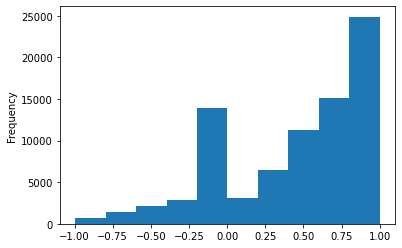

In [292]:
thanked_df['compound'].plot.hist()

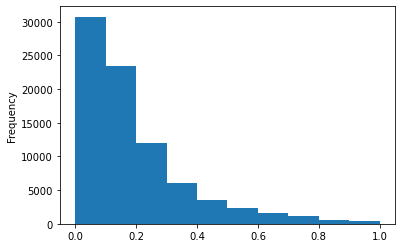

In [293]:
thanked_df['pos'].plot.hist()

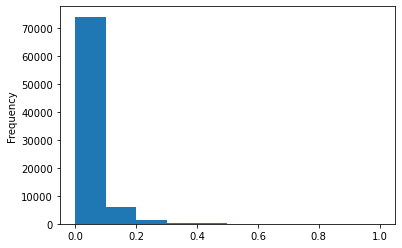

In [294]:
thanked_df['neg'].plot.hist()

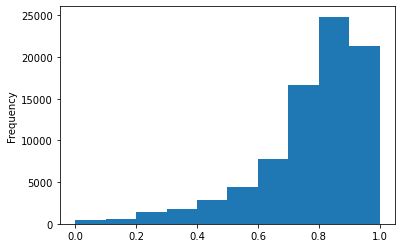

In [295]:
thanked_df['neu'].plot.hist()

In [140]:
with open('thanks.txt', 'w') as f:
    ids = thanks_df['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

In [141]:
with open('thanked.txt', 'w') as f:
    ids = thanked_df['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

In [82]:
df['is_submitter'].value_counts()

False    311629
True     95566 
Name: is_submitter, dtype: int64

In [83]:
95566/(95566+311629)

0.23469345154041676

In [84]:
95566/1237759

0.0772088912300375

### Thanked: words of interest

In [461]:
thanked_df[thanked_df['body'].str.contains('recommend')].sample(10)[['id', 'body', 'score']]

id  \
695729   dddbec1   
893298   dn3ho5x   
37034    cd4xmdq   
626853   d9x929a   
221184   cpoaja3   
1150481  e2k4hba   
1208618  e6ms1zh   
74958    cgf92wy   
948815   dqh4dfl   
154897   cmirfqz   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            body  \
695729                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    A Resin Falcon at Goulet isn't terribly more expensive than imported and you'll get it faster. That would be my recommendation!  I'd recommend the red one! And don't feel bad about getting resin instead of metal. I have both and prefer resin. The resin is a very lightweight pen... but it posts well and posted its the same weight as an unposted metal Falcon.  The SF is probably a safe bet but I personally favor the SEF!   
893298                                                                                                                                                                                                                                                                   

In [460]:
thanked_df[thanked_df['body'].str.contains('you')].sample(10)[['id', 'body', 'score']]

id  \
606197   d8lmn8h   
1133161  e18s6o8   
876640   dm78rgf   
48371    cejm1hs   
1173844  e49bmzg   
1217719  e7b6z8h   
966329   dri1lho   
180421   cnr77e3   
1131005  e137irx   
971683   dru0n4n   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 body  \
606197                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I think I had the same kind of problem with my Kaweco EF that you're talking about, but after writing with it off and on for a few weeks it has improved a lot and is really nice to write with.  Not sure if this is the same as the "baby's bottom" problem Kaweco nibs are known for, for which you can find cures on the web.    I don't have a Lamy 2000, but I do have a couple of Decimos (same nib unit as the VP), both F, and they write really smoothly and effortlessly, in fact are one of my favourite pens.  One of them writes perfectly upside down, too.  One is practically an EF and the other a bit wetter, closer to a Metro medium, but neither are dry.  They're not at all picky about a sweet spot.  If you want an idea of what the VP grip feels like, try fake writing holding your Metropolitan with the cap on and the clip facing up as though it were a VP front end.     
1133161                                                        

In [389]:
thanked_df[thanked_df['body'].str.contains('if ')].sample(10)[['id', 'body', 'score']]

id  \
921054  dooci04   
77710   cgmt7zp   
778600  dh643q6   
497163  d2w183z   
502943  d34dzr8   
372203  cxmtett   
894094  dn54eqn   
163220  cmwui0y   
714623  de3ap9u   
756522  dg17yv7   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      body  \
921054                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 You could always just get the Cosmos (which I think is the better looking one of the two) and not the Stargazer, though I don't think they look all that similar other than sharing the nightsky motif.   But remember that if you're going to be "in the hobby" for a long while, you'll see many limited editions and otherwise cool pens go by, especially if you keep up with your 5 pens rule.   Of course you could always start putting some money aside whenever you see a really cool limited edition you just can't justify buying right now, so you'll have a guilt-free fund to draw from if you ever see The-One-That-Can't-Be-Missed.   
77710                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [396]:
thanked_df[thanked_df['body'].str.contains('can ')].sample(10)[['id', 'body', 'score']]

id  \
247579   cqw63lx   
917730   dohcymn   
88449    chff63o   
558808   d5zwm8m   
125539   ckgzoo6   
1189798  e5cupm1   
49174    cem03ul   
83017    ch1pw4n   
868180   dlpybko   
841333   dkaoo0p   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             body  \
247579                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Oh, this is quite a different beast. When you hold your nib, do you rotate the nib toward the left or the right? I'm left-handed, but I write with my right hand, and my nib (sometimes) slightly rotated to the left. -_-  You could theoretically get a pen with a cursive oblique nib, but I think you might get a better writing experience if you already have a pen that you like, then send that nib to a nibmeister to have it reground. They can take into consideration writing angles, pressures, etc, to make sure the cursive is not too scratchy on paper.    
917730   Just commenting because I see that you have a bottle on the way and are currently using the included cartridge.  1st: Don't use the default converter that came with the pen! Don't get me wrong, it works just fine but it has a low ink volume and it can be a little finicky to fill completely.   2nd: **Instead!** Use your entire cartridge and SAVE the empty container. Wash it out and then use a small needle-less syringe for easy filling.  Go to any pharmacy and ask for a 1 ml ORAL syringe, no need to ask for blunted syringes or messing with needles at all and you seem 1000% less sketchy. They will most likely give this to you for free unless the tech is being a stickler and charges you the $0.30 for a single syringe (which they shouldn't, that price is normally for single insulin needles, the oral syringes are normally just free when needed).  That got a little sidetracked, apologies. Anyway, with that syringe you can refill the cartridge with any ink you desire, it's faster to fill, easier to clean, and holds much more ink than a standard converter.    
88449                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      :P I on

In [462]:
thanked_df[thanked_df['body'].str.contains('helps')].sample(10)[['id', 'body', 'score']]

id  \
1166914  e3qv75e   
622735   d9n3osl   
963492   drckfvj   
871014   dlvqvut   
887104   dmsaq1v   
515046   d3nlvef   
107275   ciz6aoe   
199682   conlzm9   
1149423  e2h7866   
258801   cre87p0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [463]:
thanked_df[thanked_df['body'].str.contains('also')].sample(10)[['id', 'body', 'score']]

id  \
264047   crm7t7w   
695100   ddcfkmg   
308875   ctz8385   
1097291  dyu3yv9   
1013860  du41lkt   
736022   df1fbsm   
31967    ccig8dh   
946335   dqa1pu0   
311813   cu4oftj   
1071778  dxdditl   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              body  \
264047                                                                                                                                                                                                                                                                                                                                                                                                                     

In [485]:
thanked_df[thanked_df['body'].str.contains('very')].sample(10)[['id', 'body', 'score']]

id  \
612      c2u5exd   
759111   dg6ofzc   
1036255  dv96qmu   
780882   dhaiaty   
1234189  e8jd2qu   
707464   ddt2rwu   
61042    cfdrc2f   
669234   dc7k5q1   
820390   dj8s0uj   
338464   cvpdld4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   body  \
612      Line size depends on the nib.  You can get anything from very fine to a broad oblique.  Some brands have interchangeable nibs and you can also have a nib custom ground to your tastes at a place like nibs.com.  There are a variety of inks, as well.  They will behave differently depending on their properties and the paper used.  I like Noodler's Ink.  They even have varieties that won't bleed on newsprint.  Take a looka the different inks and find one suitable for the paper you use.  I don't know your budget, but for your first and possibly last pen, consider the Parker 51.  It might be the most famous ever produced and is widely used as an EDC by pen fiends.  I've got about 100 different FPs and have collected since 1994.  I've carried a 51 daily for over ten years.  They don't leak, rarely need repairs (*) and hold up for decades.  The one to get is an Aerometic model in a plain color (black, gray or blue) with the stainless (aka Lustraloy) cap.  There are other variations, but collectors push prices up.  The other filling mechanism is the Vacuumatic (*) which needs a new diaphragm every several years.  The Aerometic is bulletproof and mostly needs to be cleaned if not working.  The other thing to look for is a translucent grayish jewel on top.  Don't buy one with a black jewel - those have a steel nib.  You want a gold nib.  A plain Aerometric with a steel cap will run $40-$100 or so on eBay, depending on condition and a few other factors.  There are lots of them out there, so keep an eye on auctions and a hard line on price.  One will turn up in your bu

In [487]:
thanked_df[thanked_df['body'].str.contains('not very')].sample(10)[['id', 'body', 'score']]

id  \
965180   drfhre7   
87434    chd34op   
28849    cbwxoov   
505849   d38cqi5   
190517   co7mpmg   
1020826  duh8mxq   
1155899  e2yvtmu   
920988   doo8bct   
874169   dm1yzdi   
427747   d08lfqf   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            body  \
965180                                                                                                                                                                                                                                                                                                                    You'll want paper that's quite smooth and not very absorbent - it lets the ink pool and develop that sheen/sparkle!  It makes the dry time a bit slower though, so you'll want to be careful with smudges.  The easiest way around it unless you want to go to an art store and invest in expensive smooth paper is just to get your scrapbook gears going; do your writing on paper that you know will sheen, cut it out nicely and affix decoratively on your heavy cardstock. [Like so.](https://gyazo.com/92d1304080031cc335fd2bbc94ff6732)  You'll just need some spray adhesive and maybe some fancy edging scissors if you want.  but it'll guarantee you get your sheen, and it'll look doubly fancy with the layering! Especially if you put a fancy patterned paper between the cardstock and written piece.   
87434                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              The one I have is really nice.  Very well balanced, both posted and unposted.  The nib is really smooth and it's just a tad on the wet side, not very much at all.  I would recommend a Prelude to anyone actually, especially over something like a Sonnet, another pen in that same price range and style.    
28849                                                                                                                                                                                                                                                                                                                     Interesting to hear that your M is not very different from the F.  I have a number of the 14k, 18k, and 23k Viscontis, and the one 14k M I have gushes like

In [466]:
thanked_df[thanked_df['body'].str.contains('should')].sample(10)[['id', 'body', 'score']]

id  \
593276   d7ye53x   
14653    c92qq1r   
184711   cnxvl4t   
226298   cpvs88p   
187482   co2t9uw   
412563   czlpf2d   
428448   d09fk8z   
653295   dbgzkli   
771376   dgtq137   
1032396  dv1doar   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       body  \
593276                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Overall you did pretty well. The Vacumatic for $4 is a steal for sure. One of the first pens I found in the wild is a 51. Love that thing.   Not sure how versed you are in their repair but the Vacumatic will likely need a new diaphragm.  It requires special tools - worth getting if you plan on doing lots more repairs. If this is the only one though you should consider sending it off. Aerometrics are usually good to go with just a thorough cleaning.   Because of the collector used in the 51s they take forever to soak out. When restoring them I soak them nib down to just under the collar in clean water.   At least a few times per day take them out, flip nib up and back down a few times. Then expel the water from the pen, replace your soak water and repeat the process. Do that until no more ink comes out. It will likely take days.   Sometimes that isn't enough - a few inks in that era (including Parkers Superchrome) can leave the fins in the collector terribly clogged and require more drastic measures.  Try the water flush first and if you hit problems lost back here or shoot me a PM.    
14653                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [468]:
thanked_df[thanked_df['body'].str.contains('might')].sample(10)[['id', 'body', 'score']]

id  \
685968   dczbc9r   
48359    cejjrix   
888383   dmuuy84   
1154586  e2uf2bg   
255826   cr8kyft   
206805   coz66ho   
179069   cnot0js   
827806   djndtie   
1108821  dzibk0j   
1009641  dtwgkyj   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               body  \
685968   Try emptying taking the cartridge off, flushing the grip section out with cold water under the tap.  Dry the nib/feed off on some kitchen paper towel and then try to put the cartridge in again.  You might need to rinse the nib/feed with soapy water then clear water.  Ideally if you have a bulb syringe attach it to where you attach the cartridge on the section and flush the pen through.  Sometimes you can get production oils or debris in the nib/feed section that needs a proper clean on some pens more than others.  The other thing I have found is sometimes ink cartridges don't flow as well as ink in cartridge converters in some pens.  I have a Lamy Al-Star that writes terrible, skips a lot but if I put a Z24 converter on and ink it up with the same ink it writes perfectly.  Also depending on the nib width it could be the nib has been polished too much and created a babies bottom which will do random skips, or the tines could be misaligned although you'd usually feel it's quite scratchy to write with (but not always).  The nib can also have tight tines if the flow isn't working great, using brass shims to floss the tines helps open the tines up and let ink flow more gracefully.   
48359                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             I haven't filled my 78g metro with the same ink as my vac to do an exact comparison, but for what I have inked up right now, I'd say the 78g is finer. It might just be because my vac has been writing a little wet lately since I took out the o-ring that seals the barrel from the nib and feed. I did that to stop that weird drying issue that it has. I did have it burp on me pretty bad the other day while I was signing documents though so removing that o-ring has its drawbacks.   I personally like the Vac better than the 580 but only by a very small fraction. Since I don't post my TWSBIs (weight gets funky) the Vac has a little more weight to it, but both pens are equally fun to use.    
888383                                                                                                                                                                      

In [469]:
thanked_df[thanked_df['body'].str.contains('suggest')].sample(10)[['id', 'body', 'score']]

id  \
435285   d0irh4b   
1127757  e0tz1po   
47414    ceg1v1r   
694174   ddb81jf   
947876   dqeldz1   
734291   deykm38   
896945   dnacx29   
932836   dpe4ns4   
1011964  du0fa6n   
890107   dmy4mmv   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      body  \
435285                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [482]:
thanked_df[thanked_df['body'].str.contains('hope this helps')].sample(10)[['id', 'body', 'score']]

id  \
177986   cnmjhjb   
64318    cfmwprn   
507238   d3aquwd   
532198   d4flh9q   
1152033  e2oifa3   
824064   djgeig9   
389047   cyj2mrr   
530644   d4d29w9   
688196   dd2lqup   
324392   cutew4h   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
177986                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Here's a quick writing sample of a Metro with a medi

## Submitter

In [297]:
is_submitter_df = df[df['is_submitter'] == True]
is_submitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95566 entries, 830567 to 1237758
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   edited                         95566 non-null  object        
 1   name                           0 non-null      object        
 2   body                           95566 non-null  object        
 3   controversiality               95566 non-null  int64         
 4   downs                          0 non-null      float64       
 5   id                             95566 non-null  object        
 6   score_hidden                   24479 non-null  object        
 7   score                          95566 non-null  int64         
 8   author                         95566 non-null  object        
 9   link_id                        95566 non-null  object        
 10  author_flair_text              0 non-null      float64       
 11  parent_i

In [470]:
is_submitter_df.describe(include='all')

edited name     body  controversiality  downs       id score_hidden  \
count   95566    0    95566      95566.000000    0.0    95566        24479   
unique   3362    0    92054               NaN    NaN    95566            2   
top     False  NaN  Thanks!               NaN    NaN  dy6qw1y        False   
freq    92205  NaN      596               NaN    NaN        1        24476   
first     NaN  NaN      NaN               NaN    NaN      NaN          NaN   
last      NaN  NaN      NaN               NaN    NaN      NaN          NaN   
mean      NaN  NaN      NaN          0.020604    NaN      NaN          NaN   
std       NaN  NaN      NaN          0.142054    NaN      NaN          NaN   
min       NaN  NaN      NaN          0.000000    NaN      NaN          NaN   
25%       NaN  NaN      NaN          0.000000    NaN      NaN          NaN   
50%       NaN  NaN      NaN          0.000000    NaN      NaN          NaN   
75%       NaN  NaN      NaN          0.000000    NaN      NaN          NaN   
max       NaN  NaN      NaN          1.000000    NaN      NaN          NaN   

               score       author    link_id  author_flair_text  parent_id  \
count   95566.000000        95566      95566                0.0      95566   
unique           NaN         8495      24882                NaN      93482   
top              NaN  willvintage  t3_7t8f6o                NaN  t3_8tlavj   
freq             NaN          992        125                NaN         13   
first            NaN          NaN        NaN                NaN        NaN   
last             NaN          NaN        NaN                NaN        NaN   
mean        3.054298          NaN        NaN                NaN        NaN   
std         6.060694          NaN        NaN                NaN        NaN   
min       -28.000000          NaN        NaN                NaN        NaN   
25%         1.000000          NaN        NaN                NaN        NaN   
50%         2.000000          NaN        NaN                NaN        NaN   
75%         3.000000          NaN        NaN                NaN        NaN   
max       376.000000          NaN        NaN                NaN        NaN   

       archived distinguished     subreddit          created_utc subreddit_id  \
count     42769            61         95566                95566        95566   
unique        2             1             1                95438            1   
top       False     moderator  fountainpens  2017-08-18 19:28:35     t5_2s0ew   
freq      42758            61         95566                    2        95566   
first       NaN           NaN           NaN  2017-07-04 17:52:07          NaN   
last        NaN           NaN           NaN  2018-10-31 23:58:23          NaN   
mean        NaN           NaN           NaN                  NaN          NaN   
std         NaN           NaN           NaN                  NaN          NaN   
min         NaN           NaN           NaN                  NaN          NaN   
25%         NaN           NaN           NaN                  NaN          NaN   
50%         NaN           NaN           NaN                  NaN          NaN   
75%         NaN           NaN           NaN                  NaN          NaN   
max         NaN           NaN           NaN                  NaN          NaN   

              gilded author_flair_css_class         retrieved_on  ups  \
count   95566.000000                  26583                95566  0.0   
unique           NaN                     36                95211  NaN   
top              NaN             format f64  2017-12-26 07:52:46  NaN   
freq             NaN                   3460                    2  NaN   
first            NaN                    NaN  2017-07-25 02:46:36  NaN   
last             NaN                    NaN  2018-11-08 14:46:19  NaN   
mean        0.000010                    NaN                  NaN  NaN   
std         0.003235                    NaN                  NaN  NaN   
min         0.000000         

In [298]:
is_submitter_df['created_utc'].dt.year.value_counts()

2018    62383
2017    33183
Name: created_utc, dtype: int64

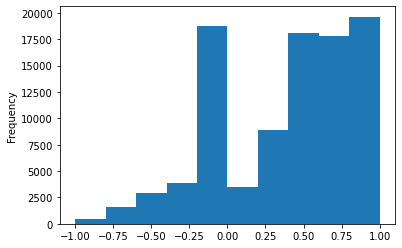

In [299]:
is_submitter_df['compound'].plot.hist()

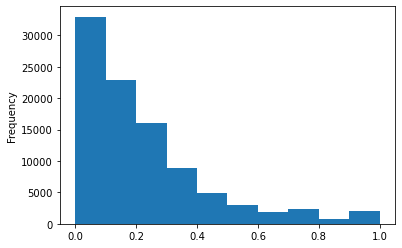

In [300]:
is_submitter_df['pos'].plot.hist()

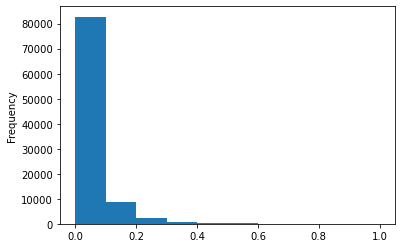

In [301]:
is_submitter_df['neg'].plot.hist()

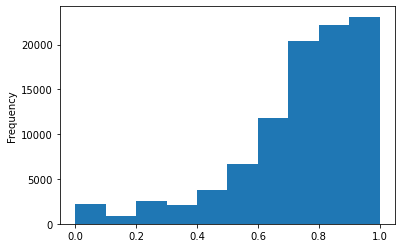

In [419]:
is_submitter_df['neu'].plot.hist()

In [422]:
is_submitter_df[is_submitter_df['body'].str.contains('did ')].sample(10)[['id', 'body', 'score']]

id  \
1226799  e7z6y9k   
911258   do3czrw   
1200920  e65isbj   
1048638  dvz4g96   
958268   dr17znv   
1018876  dudii6v   
838692   dk5v41d   
994669   dt62sx6   
952650   dqpxbr5   
1009751  dtwlxjz   

                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
1226799                                                                                                                                                                                                                            I did several pages of lettering,  writhing 1/4 of a page of Lamy it was crap.   I cleaned, flossed, flushed, rinsed, cleaned in ultrasonic, inspected with loupes.... I cannot figure out why.... 😕😫😭   
911258                                                                                                                                                                                                                    it claims to fit jinhao pens.   I did find one that would work.   https://www.amazon.com/Universal-Fountain-Pen-Ink-Converter/dp/B002P2T42G/ref=cm_wl_huc_item  some states it works for all pens like jinhao.    
1200920                                                                                                                                                                                                                                                                                                                                                                                            cool, thank you for the candid review.   
1048638                                                                                                                                                                                                                                                                                Thank you! I had just inked it so did a small sample on some copier paper lying on the table. I assume Iro and Sailor inks will give a wider line    
958268                                                                                                                                                                         I had it on my computer but don't know where I originally found it, however I did a reverse image search and found it at the following link, second image down under "Black Letter". http://www.calligraphywriting.org/popular-calligraphy-alphabet-types/   
1018876  I've seen this video before (within the past couple of days actually) and didn't think about it when I did my test.  Before video... 0.8 ml  After video... 1.3 ml  OHS (operator headspace).   So I'm guessing that my results of a page and a have were probably expected when only 1/2 full and using the broad (and really wet) nib maybe?  Thanks for pointing me back to the video. There's harmony in the universe again.   
838692                                                                                                                                                                                                                                                                                           [I did a small recording on my instagram. not gif worthy but it shows the color shift pretty ok!](https://instagram.com/p/BWfFmgwjCnT/)    
994669                                                                       I managed to work the ring off with some pliers and scraps of leather without damaging it, at least upon physical inspection. It did it appear to be actually doing any specific job there-just seemed like it was glued on as an afterthought for no real reason. I haven’t attempted to fi

In [424]:
is_submitter_df[is_submitter_df['body'].str.contains('wanted')].sample(10)[['id', 'body', 'score']]

id  \
1079783  dxudust   
905752   dnr23kw   
1148136  e2dtfj4   
890399   dmyo9a9   
1134141  e1bpjja   
1075401  dxl0co8   
1236169  e8p5qjl   
1148574  e2ewweo   
1121010  e0d8z0b   
1152060  e2ok4mu   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      body  \
1079783                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [471]:
is_submitter_df[is_submitter_df['body'].str.contains('decided')].sample(10)[['id', 'body', 'score']]

id  \
1213237  e6ytkom   
1185941  e53uvkq   
1009806  dtwq951   
921467   dooylw9   
1209820  e6pqso8   
892084   dn1kw7m   
1010927  dtyoips   
883384   dml9ck3   
915694   doc8dp2   
1077735  dxq7k2t   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   body  \
1213237                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [nibbage](https://i.imgur.com/zu9kOs5.jpg)  I haven't worked an Estie into my work rotation in a while so when my TWSBI went dry this morning I decided to ink up my green J.  Forgot how much I love this pen. The nib has a definite sweet spot, like a lot of Esterbrook nibs, but it's a pretty good sized sweet spot and when you're in it.... boy is it smooth and juicy.  Paper is a scrap of Tomoe River btw.   
1185941                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         I haven't decided yet!    
1009806                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [472]:
is_submitter_df[is_submitter_df['body'].str.contains('definitely')].sample(10)[['id', 'body', 'score']]

id  \
1224707  e7tpa9p   
1040466  dvi3343   
1157467  e32ihrk   
1091549  dyi2fx6   
898417   dncxifq   
868338   dlq81vj   
1144991  e25jby2   
1190021  e5dkrg7   
932185   dpcmkrh   
913284   do7mnrm   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                body  \
1224707  Thank you so much for your answer! And yeah, my Stargazer did NOT have that gap. Holy shit, that's sad to figure out. I'd basically given up on Pilot because of that experience. I thought they just weren't for me.   Anyhow, sounds like the SF will be my better bet, after what I've read. I actually like the overall look of those pens better than the ones that come with the FA, and I've been browsing the sub a lot to see how people like them, and it looks as though they kind of *need* a different (ebonite?) feed to work well. And to be honest, I don't like to fiddle with my pens an awful lot. So I suppose I'll go with the falcon SF.  And I'll definitely try to go easy on the pen. I'm not really looking for calligraphy-levels of flexing, just line variation. It's just that I already have a stub and it's not doing things for me that I want it to do. I think the flexier nibs will :)    
1040466                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Interesting! Thanks for your input! I’m definitely looking for something I’ll use all the time, all day erey day. I figured the M805 to be more in that category than the 146.   
1157467                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        It’s definitely an interesting combination of materials. I actually hated the look when I first saw it, but it’s grown on me. Both materials are smooth to the touch, but the ebonite breaks up the kind of slickness of the acrylic with a sort of softer feel if that makes sense.    
1091549                                                                                                                                                                          

In [473]:
is_submitter_df[is_submitter_df['body'].str.contains('this')].sample(10)[['id', 'body', 'score']]

id  \
889980   dmxvldt   
1020211  dug4ny7   
1044523  dvqr3zh   
906108   dnrwevu   
1058189  dwjqp73   
897343   dnb5b0w   
1082307  dxz7wve   
947997   dqex7rq   
1206424  e6hgrfa   
1236190  e8p7lnv   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
889980                                                                                                                            Hey! I guess the rule regarding quality control of Chinese products always applies, and therefore these pens might be hit or miss. In my case, so far so good. There seems so be a good amount of silicone grease between the seals, and the piston operates extremely smoothly retracting almost all the way, (something which I've heard can be a problem with this pen). I should also say that this is only my second piston filler, so I'm perhaps not as familiar with how things should be as most, but so far, for €10 it's a hell of a pen. -N   
1020211  Thank you for reading my post. You are the first person to comment on what I have written so I really appreciate you taking your time to share your story about our beloved Lamy. Reading your comment feels like watching my own journey in the fountain-pen world. From how this pen shaped my first of many upper-market purchases to how it still comes back in my pocket as a daily writer. It makes me appreciate that had I not chosen this pen to be my first 'proper' pen purchase I may have stopped collecting. Thus, prevented myself from discovering this hobby which makes the mundane everyday tasks such as writing one of the most exciting tasks of the day.    
1044523                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             I have so far encountered models with both over and under -feed, and the ones like this, which only has the overfeed.   
906108                                                                                                                                                                                                                                                                                                                                                                                                                                  When the plunger is pushed down, the diaphragm pushes the air out via a breather tube on the feed and ink fills up the barrel in exchange.  Repeat this until full. The barrel is translucent so you can see the ink level.   A very cool design.   
1058189                                                                                                                                                                                           [These are the pics I sent](https://imgur.com/a/vltMt) - it was the best I could do with my phone camera.   I'm no pro but from what I understand, they weld the iridium grain to the tip which gives it the thickness at the tip (otherwise it would just bee

In [474]:
is_submitter_df[is_submitter_df['body'].str.contains('yeah')].sample(10)[['id', 'body', 'score']]

id  \
838411   dk5a0b3   
970906   drsa84h   
898476   dnd17ck   
1114943  dzyf42m   
1032262  dv16eua   
980914   dsdo6ih   
1129504  e0z2jo2   
1193768  e5ngupp   
1050978  dw44d0l   
915711   doc9k69   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            body  \
838411                                                                                                                                                                                             Oh, I don't really post, unless the pen is extraordinarily short, so that shouldn't be an issue... And yeah, I suppose one might expect a bit better quality from a $20 pen, as you have said, since it really is rather expensive for your everyday "chinese" merchandise...   
970906                                                                                                                                                                                                                                                                                                                                                                  yeah the ammount of that stuff would enable skilled hands to regrind it into pretty much anything really   
898476                                                                                                                                                                                                                                                                                                                                                                                                     Compared to a lot of other ones I've seen on this sub, yeah little. 😁   
1114943                                                                                                                                                                                                                                                                                                                                                                                            yeah, I realized that as I posted and figured I’d just leave it.  rawr &gt;:3   
1032262                                                                                                                                                                                                                                                                                                                                                                                               yeah, why? do you know how to map the print button?! please tell me you do   
980914                                                                                                                                                                                                        Sigh... yeah, you're right.  As much as I hate to think of it, not all pens are created equal.  What _should_ be a good pen just simply may not be.  I'm hoping I can get the Stipula and Conklin working satisfactorily at some point as they weren't cheap pens.   
1129504                                                                                                                                                                                                                                                                                                                         happy cake day! and yeah I love the color! It adds a nice antique/fall vibe I think! and seeing it dry down into that darker color is wonderful!   
1193768                                          

In [475]:
is_submitter_df[is_submitter_df['body'].str.contains('haha')].sample(10)[['id', 'body', 'score']]

id  \
1139554  e1p0wex   
1151174  e2m16ul   
1024378  duo4ivb   
844671   dkgdf9c   
998068   dtcajc3   
1191570  e5hq22z   
1211506  e6u6b0k   
1210095  e6qfwb6   
966085   drhikvc   
1080691  dxw4gq2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       body  \
1139554                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                It was a post that I saw on here that made me pull the trigger haha. Enablers, enablers everywhere!!   
1151174                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I've yet to test how fragile/longlasting it is, so for all you know (and me tbh) I might be pretty bad at sewing haha. If I was a tad more confident I might sell some, but I'll brush up on my sewing skills a bit more before considering selling stuff   
1024378                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                https://imgur.com/gallery/9S5p4  Here are some more pics. I was able to unscrew the body. It seems like the spring is still intact from me taking it apart an

In [428]:
with open('is_submitter.txt', 'w') as f:
    ids = is_submitter_df['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

## Questions

In [302]:
question_df = df[df['body'].str.contains("\?")]
question_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238202 entries, 6 to 1237747
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   edited                         238202 non-null  object        
 1   name                           59261 non-null   object        
 2   body                           238202 non-null  object        
 3   controversiality               238202 non-null  int64         
 4   downs                          59261 non-null   float64       
 5   id                             238202 non-null  object        
 6   score_hidden                   79205 non-null   object        
 7   score                          238202 non-null  int64         
 8   author                         238202 non-null  object        
 9   link_id                        238202 non-null  object        
 10  author_flair_text              0 non-null       float64       
 11 

In [303]:
question_df.describe(include='all')

edited        name               body  controversiality    downs  \
count   238202       59261             238202     238202.000000  59261.0   
unique    9807       59261             232612               NaN      NaN   
top      False  t1_cf1fx8a  What pen is that?               NaN      NaN   
freq    228378           1                121               NaN      NaN   
first      NaN         NaN                NaN               NaN      NaN   
last       NaN         NaN                NaN               NaN      NaN   
mean       NaN         NaN                NaN          0.010101      0.0   
std        NaN         NaN                NaN          0.099993      0.0   
min        NaN         NaN                NaN          0.000000      0.0   
25%        NaN         NaN                NaN          0.000000      0.0   
50%        NaN         NaN                NaN          0.000000      0.0   
75%        NaN         NaN                NaN          0.000000      0.0   
max        NaN         NaN                NaN          1.000000      0.0   

             id score_hidden          score         author    link_id  \
count    238202        79205  238202.000000         238202     238202   
unique   238202            2            NaN          25136      67741   
top     dp0ag6i        False            NaN  AutoModerator  t3_7t8f6o   
freq          1        79011            NaN           2310        132   
first       NaN          NaN            NaN            NaN        NaN   
last        NaN          NaN            NaN            NaN        NaN   
mean        NaN          NaN       2.646514            NaN        NaN   
std         NaN          NaN       5.201726            NaN        NaN   
min         NaN          NaN     -77.000000            NaN        NaN   
25%         NaN          NaN       1.000000            NaN        NaN   
50%         NaN          NaN       2.000000            NaN        NaN   
75%         NaN          NaN       3.000000            NaN        NaN   
max         NaN          NaN     476.000000            NaN        NaN   

        author_flair_text  parent_id archived distinguished     subreddit  \
count                 0.0     238202    92921          2330        238202   
unique                NaN     173481        2             2             1   
top                   NaN  t3_544vlm    False     moderator  fountainpens   
freq                  NaN         81    67394          2329        238202   
first                 NaN        NaN      NaN           NaN           NaN   
last                  NaN        NaN      NaN           NaN           NaN   
mean                  NaN        NaN      NaN           NaN           NaN   
std                   NaN        NaN      NaN           NaN           NaN   
min                   NaN        NaN      NaN           NaN           NaN   
25%                   NaN        NaN      NaN           NaN           NaN   
50%                   NaN        NaN      NaN           NaN           NaN   
75%                   NaN        NaN      NaN           NaN           NaN   
max                   NaN        NaN      NaN           NaN           NaN   

                created_utc subreddit_id         gilded  \
count                238202       238202  238202.000000   
unique               237363            1            NaN   
top     2016-04-30 06:10:59     t5_2s0ew            NaN   
freq                     18       238202            NaN   
first   2010-09-20 15:17:56          NaN            NaN   
last    2018-10-31 23:39:24          NaN            NaN   
mean                    NaN          NaN       0.000134   
std                     NaN          NaN       0.011590   
min                     NaN          NaN       0.000000   
25%                     NaN          NaN       0.000000   
50%                     NaN          NaN       0.000000   
75%                     NaN          NaN       0.000000   
max                     NaN          NaN       1.000000   

       author_

In [180]:
question_df.head()

edited        name  \
6   False  t1_c3o1fzr   
16  False  t1_c3o2q20   
21  False  t1_c3o4e9a   
24  False  t1_c3o521r   
36  False  t1_c3oap7k   

                                                                                                                                                                                                                                                                                                                                                                                           body  \
6   So is there a Moleskine-like alternative anyone is aware of, that does take fountain pen ink well?                                                                                                                                                                                                                                                                                            
16  There's a [trick with blotter paper](http://youtu.be/JGsOU1EJumc?t=6m00s) you can use to avoid the wait time.                                                                                                                                                                                                                                                                                 
21  i love moleskins, but not for use of my pens just because of the bleeding aspect and the inconsistency of the paper at times. Ballpoint pen for a moleskin is usually the way I go, just because the notebooks are so damn handy when you're on the go. Then when you get home, transcribe onto better paper with your fountain pen. Involved? yes, but worth it.   TL;DR - ball point pen.   
24  Thanks!   I doubt it will see much traffic, but who knows?                                                                                                                                                                                                                                                                                                                                    
36  Al-star, Safari, and Vista are all nearly identical, the only differences being material. The Safari is ABS plastic, the Al-star is aluminum with a clear plastic feed, the Vista is the demonstrators model(Which I assume is ABS as well?).                                                                                                                                                 

    controversiality  downs       id score_hidden  score       author  \
6   0                 0.0    c3o1fzr  False        3      ArchGoodwin   
16  0                 0.0    c3o2q20  False        3      zanonymous    
21  0                 0.0    c3o4e9a  False        1      spookymoon    
24  0                 0.0    c3o521r  False        1      ArchGoodwin   
36  0                 0.0    c3oap7k  False        2      timsandtoms   

     link_id  author_flair_text   parent_id archived distinguished  \
6   t3_pber1 NaN                 t3_pber1    True     NaN            
16  t3_pber1 NaN                 t1_c3o05gu  True     NaN            
21  t3_pber1 NaN                 t3_pber1    True     NaN            
24  t3_pber1 NaN                 t1_c3o31m5  True     NaN            
36  t3_pc7sc NaN                 t1_c3o7w82  True     NaN            

       subreddit         created_utc subreddit_id  gilded  \
6   fountainpens 2012-02-05 05:54:48  t5_2s0ew     0        
16  fountainpens 2012-02-05 09:09:13  t5_2s0ew     0        
21  fountainpens 2012-02-05 16:09:35  t5_2s0ew     0        
24  fountainpens 2012-02-05 17:32:08  t5_2s0ew     0        
36  fountainpens 2012-02-06 03:18:47  t5_2s0ew     0        

   author_flair_css_class        retrieved_on  ups  removal_reason  \
6   NaN                   2015-04-06 05:35:33  3.0 NaN               
16  NaN                   2015-04-06 05:45:37  3.0 NaN               
21  NaN                   2015-04-06 05:59:54  1.0 NaN               
24  NaN               

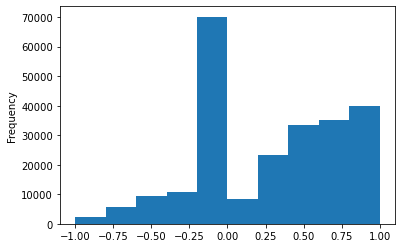

In [304]:
question_df['compound'].plot.hist()

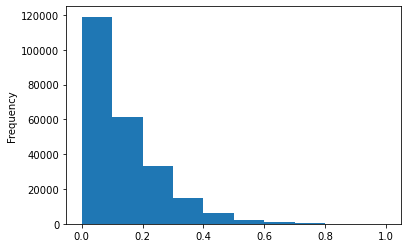

In [305]:
question_df['pos'].plot.hist()

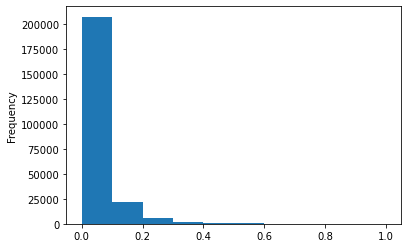

In [306]:
question_df['neg'].plot.hist()

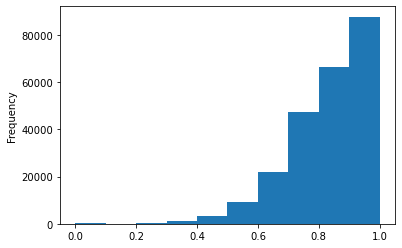

In [307]:
question_df['neu'].plot.hist()

In [181]:
with open('is_question.txt', 'w') as f:
    ids = is_submitter_df['id'].tolist()
    for id in ids:
        f.write(f"{id}\n")

## Questioned

In [187]:
questioned_ids = question_df['parent_id'].tolist()
questioned_ids = [x.replace('t1_', "") for x in questioned_ids if x.startswith('t1')]

In [188]:
questioned_fd = FreqDist(questioned_ids)

In [308]:
questioned_fd.most_common(10)

[('d2n2yhj', 35),
 ('d2mn5cx', 16),
 ('d2mny70', 15),
 ('d2zm07n', 14),
 ('d1vhwvn', 12),
 ('d2vzspu', 11),
 ('d5mrcs5', 11),
 ('d1w1kgs', 9),
 ('d27lgu5', 9),
 ('d3acb3h', 9)]

In [309]:
questioned_unique = []
for key in questioned_fd:
    if key in questioned_unique:
        continue
    questioned_unique.append(key)

In [310]:
len(questioned_unique)

118738

In [311]:
questioned_df = df[df['id'].isin(questioned_unique)]

In [312]:
questioned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116673 entries, 1 to 1237705
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   edited                         116673 non-null  object        
 1   name                           30622 non-null   object        
 2   body                           116673 non-null  object        
 3   controversiality               116673 non-null  int64         
 4   downs                          30622 non-null   float64       
 5   id                             116673 non-null  object        
 6   score_hidden                   39860 non-null   object        
 7   score                          116673 non-null  int64         
 8   author                         116673 non-null  object        
 9   link_id                        116673 non-null  object        
 10  author_flair_text              0 non-null       float64       
 11 

In [313]:
questioned_df.describe(include='all')

edited        name               body  controversiality    downs  \
count   116673       30622             116673     116673.000000  30622.0   
unique    6208       30622             116114               NaN      NaN   
top      False  t1_chrn57j  Automod: Activate               NaN      NaN   
freq    110461           1                 54               NaN      NaN   
first      NaN         NaN                NaN               NaN      NaN   
last       NaN         NaN                NaN               NaN      NaN   
mean       NaN         NaN                NaN          0.015711      0.0   
std        NaN         NaN                NaN          0.124354      0.0   
min        NaN         NaN                NaN          0.000000      0.0   
25%        NaN         NaN                NaN          0.000000      0.0   
50%        NaN         NaN                NaN          0.000000      0.0   
75%        NaN         NaN                NaN          0.000000      0.0   
max        NaN         NaN                NaN          1.000000      0.0   

             id score_hidden          score  author    link_id  \
count    116673        39860  116673.000000  116673     116673   
unique   116673            2            NaN   17079      45373   
top     dijcsli        False            NaN   JobeX  t3_30mxg6   
freq          1        39744            NaN    1266         85   
first       NaN          NaN            NaN     NaN        NaN   
last        NaN          NaN            NaN     NaN        NaN   
mean        NaN          NaN       3.983612     NaN        NaN   
std         NaN          NaN      10.225411     NaN        NaN   
min         NaN          NaN    -131.000000     NaN        NaN   
25%         NaN          NaN       1.000000     NaN        NaN   
50%         NaN          NaN       2.000000     NaN        NaN   
75%         NaN          NaN       4.000000     NaN        NaN   
max         NaN          NaN    1016.000000     NaN        NaN   

        author_flair_text  parent_id archived distinguished     subreddit  \
count                 0.0     116673    46141            57        116673   
unique                NaN      97170        2             2             1   
top                   NaN  t3_4ap551    False     moderator  fountainpens   
freq                  NaN         42    33360            55        116673   
first                 NaN        NaN      NaN           NaN           NaN   
last                  NaN        NaN      NaN           NaN           NaN   
mean                  NaN        NaN      NaN           NaN           NaN   
std                   NaN        NaN      NaN           NaN           NaN   
min                   NaN        NaN      NaN           NaN           NaN   
25%                   NaN        NaN      NaN           NaN           NaN   
50%                   NaN        NaN      NaN           NaN           NaN   
75%                   NaN        NaN      NaN           NaN           NaN   
max                   NaN        NaN      NaN           NaN           NaN   

                created_utc subreddit_id         gilded  \
count                116673       116673  116673.000000   
unique               116609            1            NaN   
top     2016-03-06 04:00:31     t5_2s0ew            NaN   
freq                      2       116673            NaN   
first   2010-09-03 13:46:42          NaN            NaN   
last    2018-10-31 22:30:10          NaN            NaN   
mean                    NaN          NaN       0.000317   
std                     NaN          NaN       0.017805   
min                     NaN          NaN       0.000000   
25%                     NaN          NaN       0.000000   
50%                     NaN          NaN       0.000000   
75%                     NaN          NaN       0.000000   
max                     NaN          NaN       1.000000   

       author_flair_css_class         retrieved_on           ups  \
count                   54236               

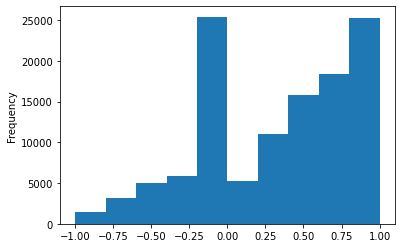

In [314]:
questioned_df['compound'].plot.hist()

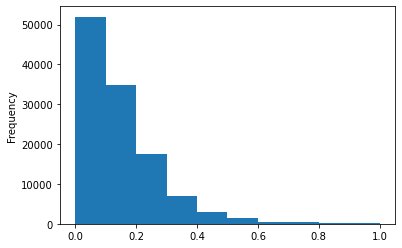

In [315]:
questioned_df['pos'].plot.hist()

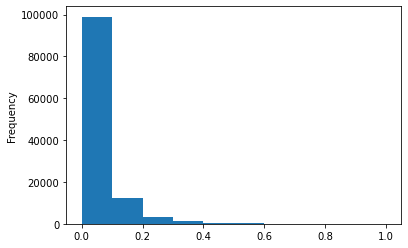

In [316]:
questioned_df['neg'].plot.hist()

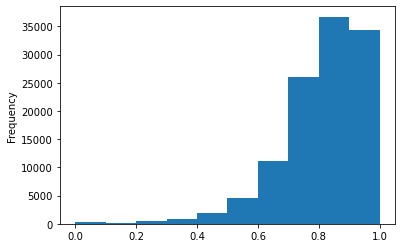

In [317]:
questioned_df['neu'].plot.hist()

## Submitter vs Question vs Questioned

In [403]:
len(is_submitter_df.index)

95566

In [405]:
len(question_df.index)

238202

In [406]:
len(questioned_df.index)

116673

In [408]:
len(set(question_df.index) - set(questioned_df.index))

209143

In [409]:
209143/238202

0.8780069017052754

87.8% of comments that have questions are replies to comments that have questions

In [417]:
questioned_df[questioned_df['body'].str.contains("\?")].sample(10)[['id', 'body', 'score']]

id  \
562481   d68bsf3   
290920   csyv69z   
853682   dkwrlrv   
424452   d03pekz   
915315   dobhq7m   
1124428  e0m9wlk   
1179679  e4olrdl   
52705    ceuku1p   
897995   dnc7uw7   
951029   dqmos91   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        body  \
562481                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Why did you have to show me a new pen company? Hasn't my bank account suffered enough already?   
290920                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           should work, yeah.  Yeah, muji has some weird shipping things. But they have great notebooks, so maybe just a larger order?   
853682                                                                                           

Follow-up questions.